<a href="https://www.kaggle.com/code/iabdulmutalib/bouston-house-price-ipynb?scriptVersionId=270620557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df =  pd.read_csv("/kaggle/input/house-price/house_prices.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [5]:

df.describe()
df.isnull().sum()


Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [6]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df.columns

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')

In [8]:
df.isnull().sum().sort_values(ascending=False)
df.dropna(thresh=0.5*len(df), axis=1)



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,1,2,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,NaN,Freehold
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,NaN,Freehold
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,NaN,Co-operative Society
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,3,3,Freehold
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",3,2,Freehold
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,Semi-Furnished,NaN,Main Road,2,NaN,NaN


In [9]:
df.drop(['Dimensions', 'Plot Area','Description','Amount(in rupees)'], axis=1, inplace=True)

In [10]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(subset=['Price (in rupees)'])



,Index,Title,Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,East,Main Road,Srushti Siddhi Mangal Murti Complex,1,2,1 Covered,Freehold,1100 sqft
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,2,1 Open,Freehold,1100 sqft
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,2,1 Covered,Freehold,1100 sqft
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,6034.0,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,East,Main Road,Hamdam Apartment,1,1,1 Covered,Freehold,1100 sqft
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,2,1 Covered,Co-operative Society,1100 sqft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,3225.0,zirakpur,1000 sqft,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,3274.0,zirakpur,1000 sqft,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,2,1 Covered,Freehold,1680 sqft
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,1100 sqft
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,4231.0,zirakpur,1000 sqft,Ready to Move,2 out of 2,Resale,Semi-Furnished,East,Main Road,Friends Enclave,2,2,1 Covered,Freehold,709 sqft


In [12]:
# Check which columns have missing values
df.isnull().sum()


Index                0
Title                0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Car Parking          0
Ownership            0
Super Area           0
dtype: int64

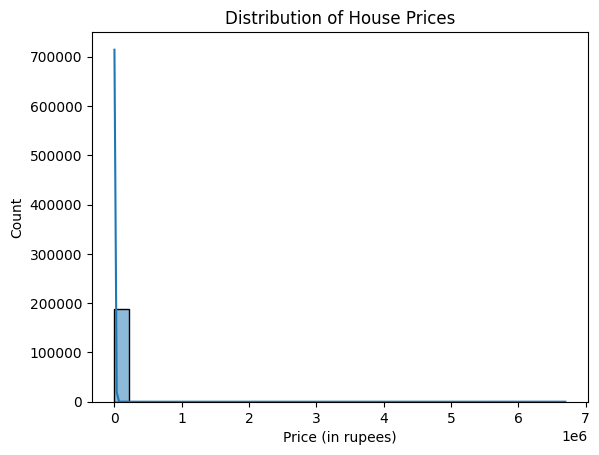

In [13]:
sns.histplot(df['Price (in rupees)'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()


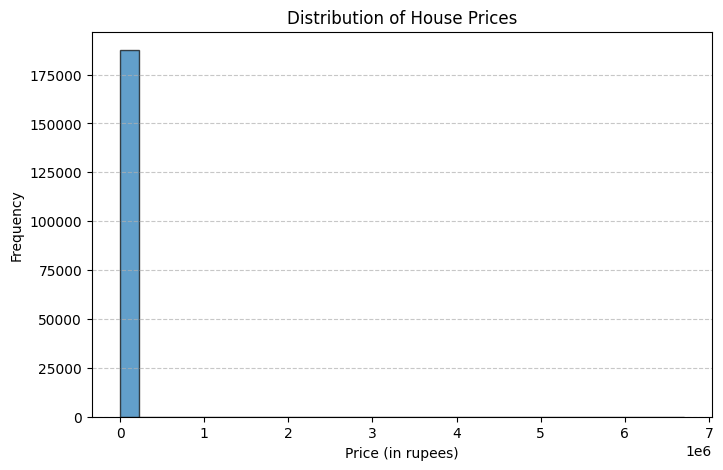

In [14]:


plt.figure(figsize=(8, 5))
plt.hist(df['Price (in rupees)'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of House Prices")
plt.xlabel("Price (in rupees)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


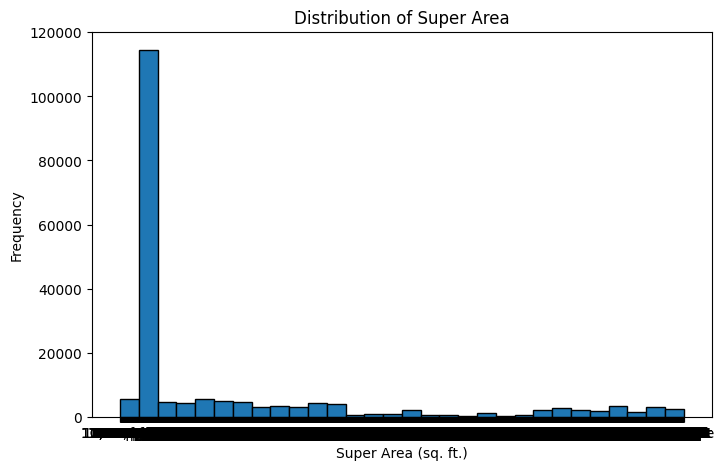

In [15]:
# Sort data by Super Area
sorted_df = df.sort_values(by='Super Area')

# Histogram of Super Area
plt.figure(figsize=(8, 5))
plt.hist(sorted_df['Super Area'], bins=30, edgecolor='black')
plt.title("Distribution of Super Area")
plt.xlabel("Super Area (sq. ft.)")
plt.ylabel("Frequency")
plt.show()




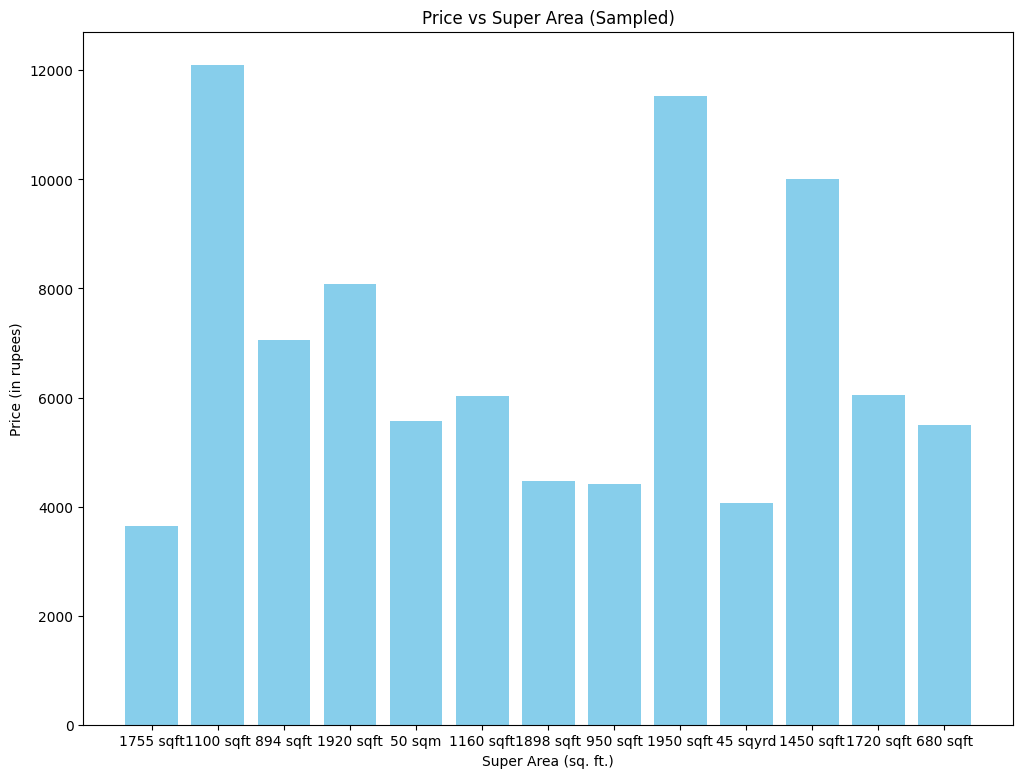

In [16]:
sample_df = sorted_df.sample(30, random_state=1)

plt.figure(figsize=(12, 9))
plt.bar(sample_df['Super Area'], sample_df['Price (in rupees)'], color='skyblue')
plt.title("Price vs Super Area (Sampled)")
plt.xlabel("Super Area (sq. ft.)")
plt.ylabel("Price (in rupees)")
plt.show()


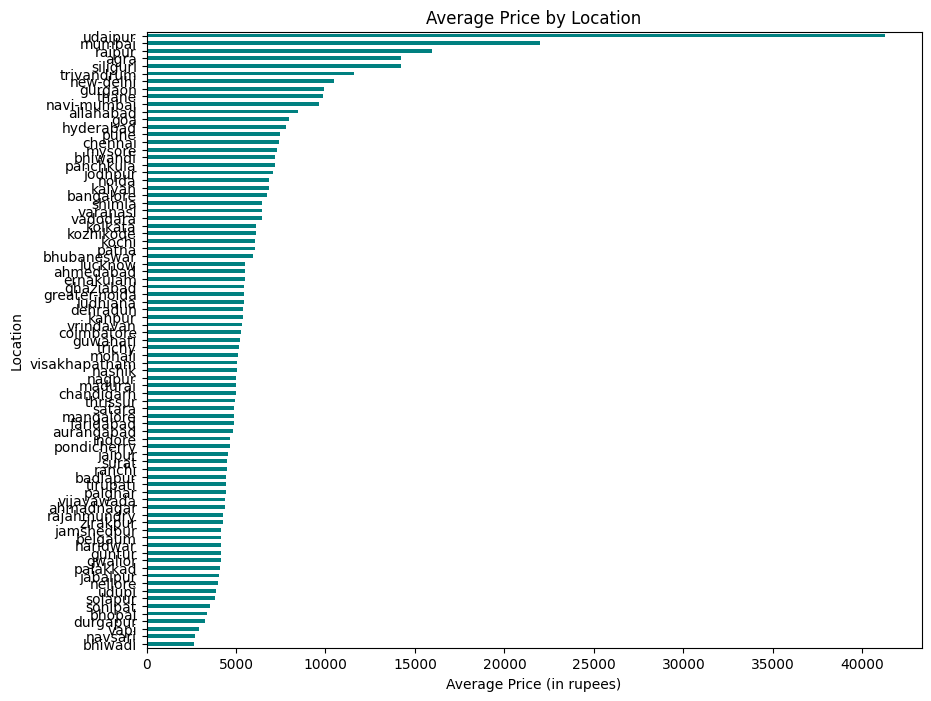

In [17]:
import matplotlib.pyplot as plt

# Group by location and calculate average price
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
avg_price.plot(kind='barh', color='teal')
plt.title("Average Price by Location")
plt.xlabel("Average Price (in rupees)")
plt.ylabel("Location")
plt.show()


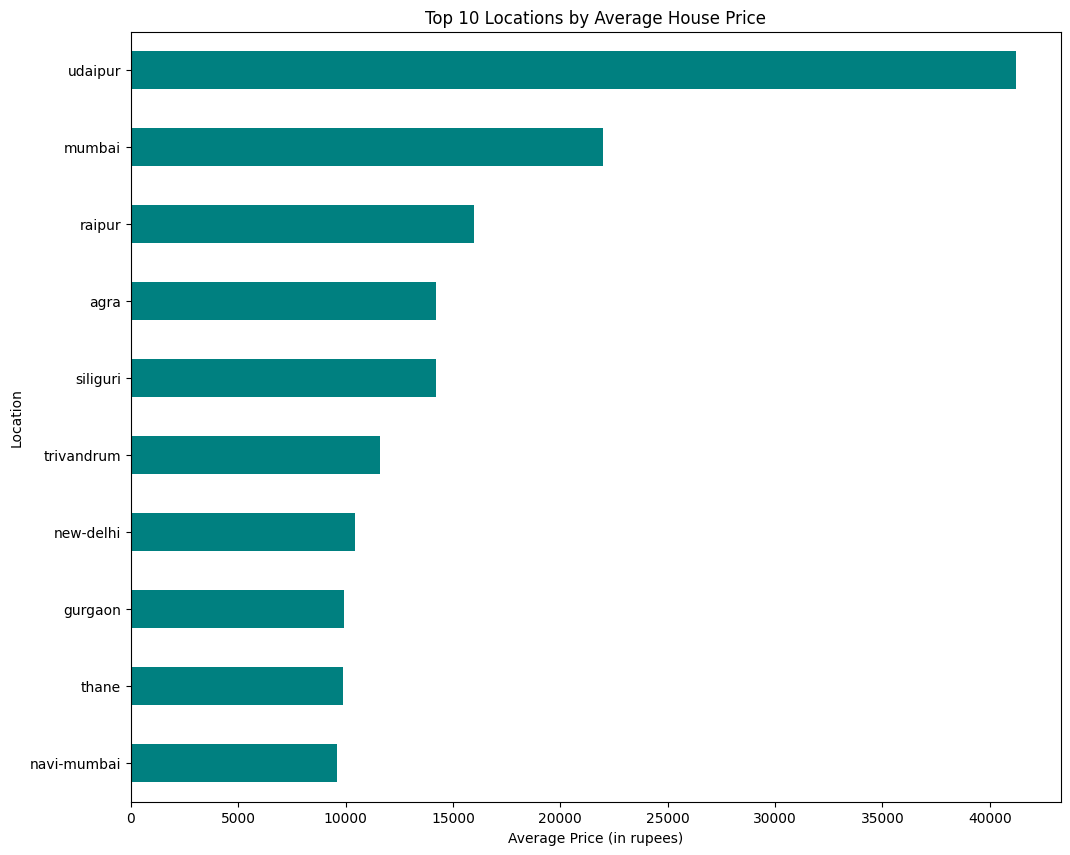

In [18]:
top_locations = avg_price.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 10))
top_locations.plot(kind='barh', color='teal')
plt.title("Top 10 Locations by Average House Price")
plt.xlabel("Average Price (in rupees)")
plt.ylabel("Location")
plt.gca().invert_yaxis()  # so the highest appears at the top
plt.show()


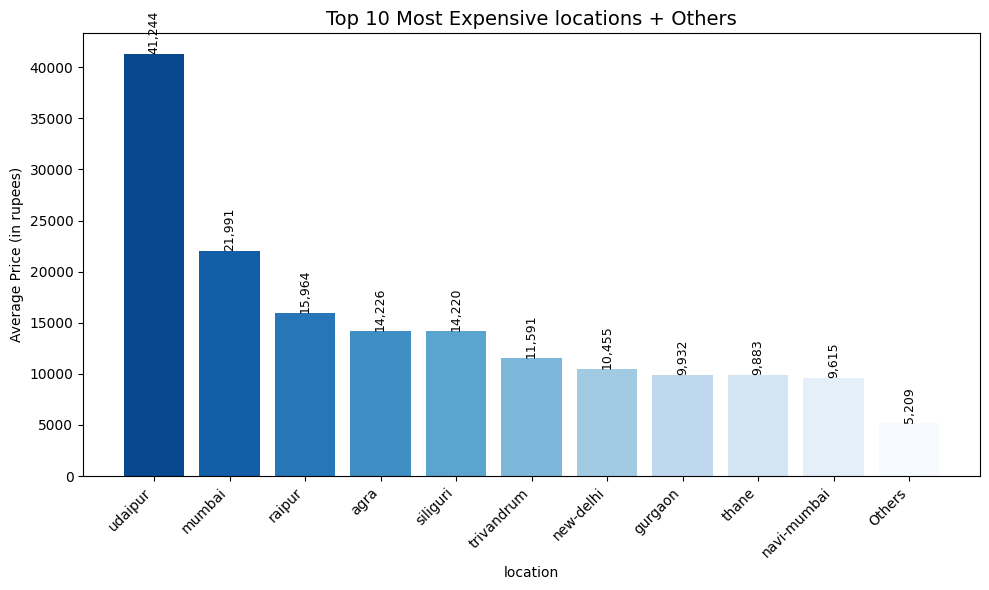

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by location and calculate average price
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False)

# Get top 10 most expensive locations
top_10 = avg_price.head(10)

# Calculate the average price of all other locations
others = avg_price[~avg_price.index.isin(top_10.index)].mean()

# Combine top 10 with 'Others' using concat (modern method)
combined = pd.concat([top_10, pd.Series({'Others': others})])

# Sort so that 'Others' stays at the bottom
combined = combined.sort_values(ascending=False)

# Create color gradient (darker blue for higher price)
colors = plt.cm.Blues([i / len(combined) for i in range(len(combined))])[::-1]

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(combined.index, combined.values, color=colors)
plt.title("Top 10 Most Expensive locations + Others", fontsize=14)
plt.xlabel("location")
plt.ylabel("Average Price (in rupees)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.0f}", 
             ha='center', va='bottom', fontsize=9, rotation=90)

plt.show()


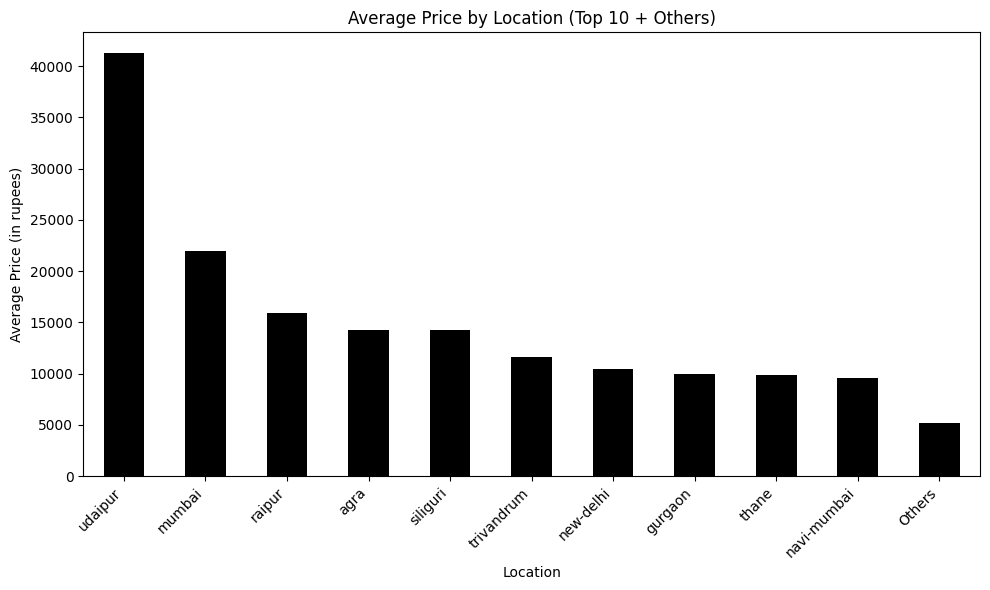

In [20]:
others = avg_price[~avg_price.index.isin(top_10.index)].mean()

# Combine top 10 with 'Others' using concat 
combined = pd.concat([top_10, pd.Series({'Others': others})])

# Plot
plt.figure(figsize=(10, 6))
combined.plot(kind='bar', color='Black')
plt.title("Average Price by Location (Top 10 + Others)")
plt.xlabel("Location")
plt.ylabel("Average Price (in rupees)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


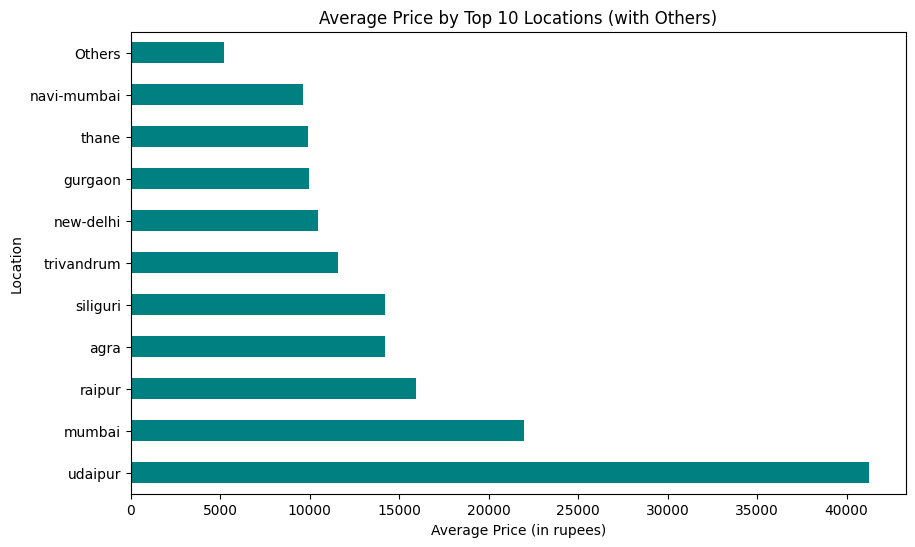

In [21]:
# assume avg_price and top_10 are already defined
others = avg_price[~avg_price.index.isin(top_10.index)].mean()

# ✅ replace append() with pd.concat()
combined = pd.concat([top_10, pd.Series({'Others': others})])

# Plot
plt.figure(figsize=(10, 6))
combined.plot(kind='barh', color='teal')
plt.title("Average Price by Top 10 Locations (with Others)")
plt.xlabel("Average Price (in rupees)")
plt.ylabel("Location")
plt.show()

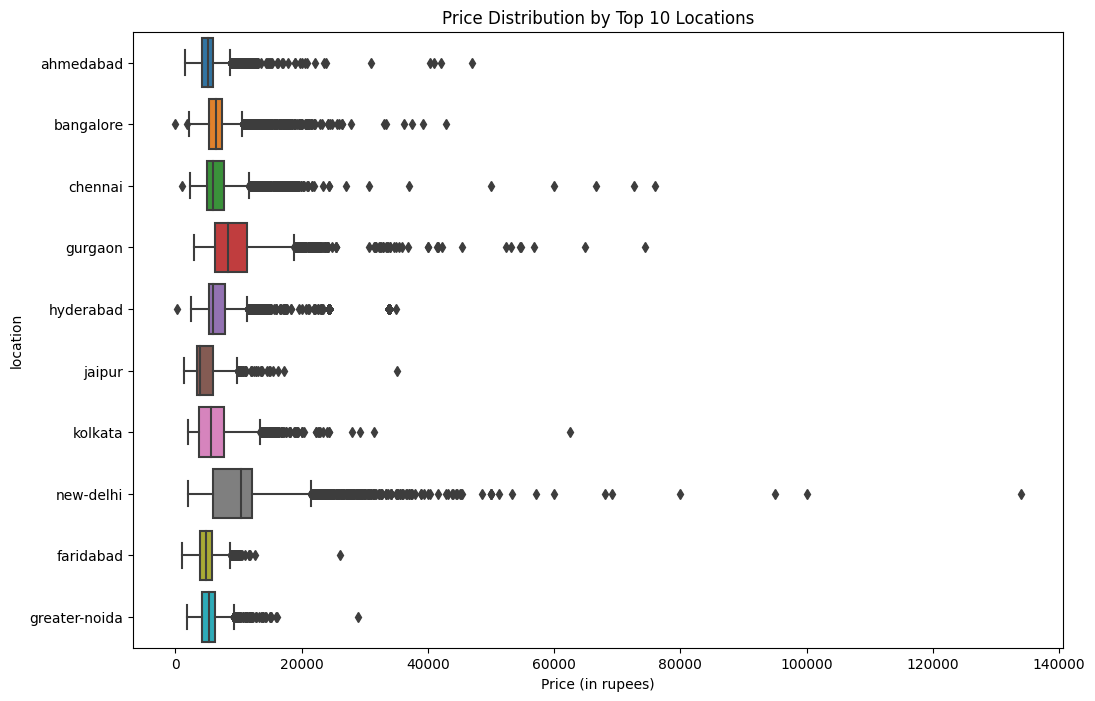

In [22]:


plt.figure(figsize=(12, 8))
top_locs = df['location'].value_counts().head(10).index  # most frequent locations
sns.boxplot(data=df[df['location'].isin(top_locs)], x='Price (in rupees)', y='location')
plt.title("Price Distribution by Top 10 Locations")
plt.show()


/tmp/ipykernel_13/1757579813.py:30: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


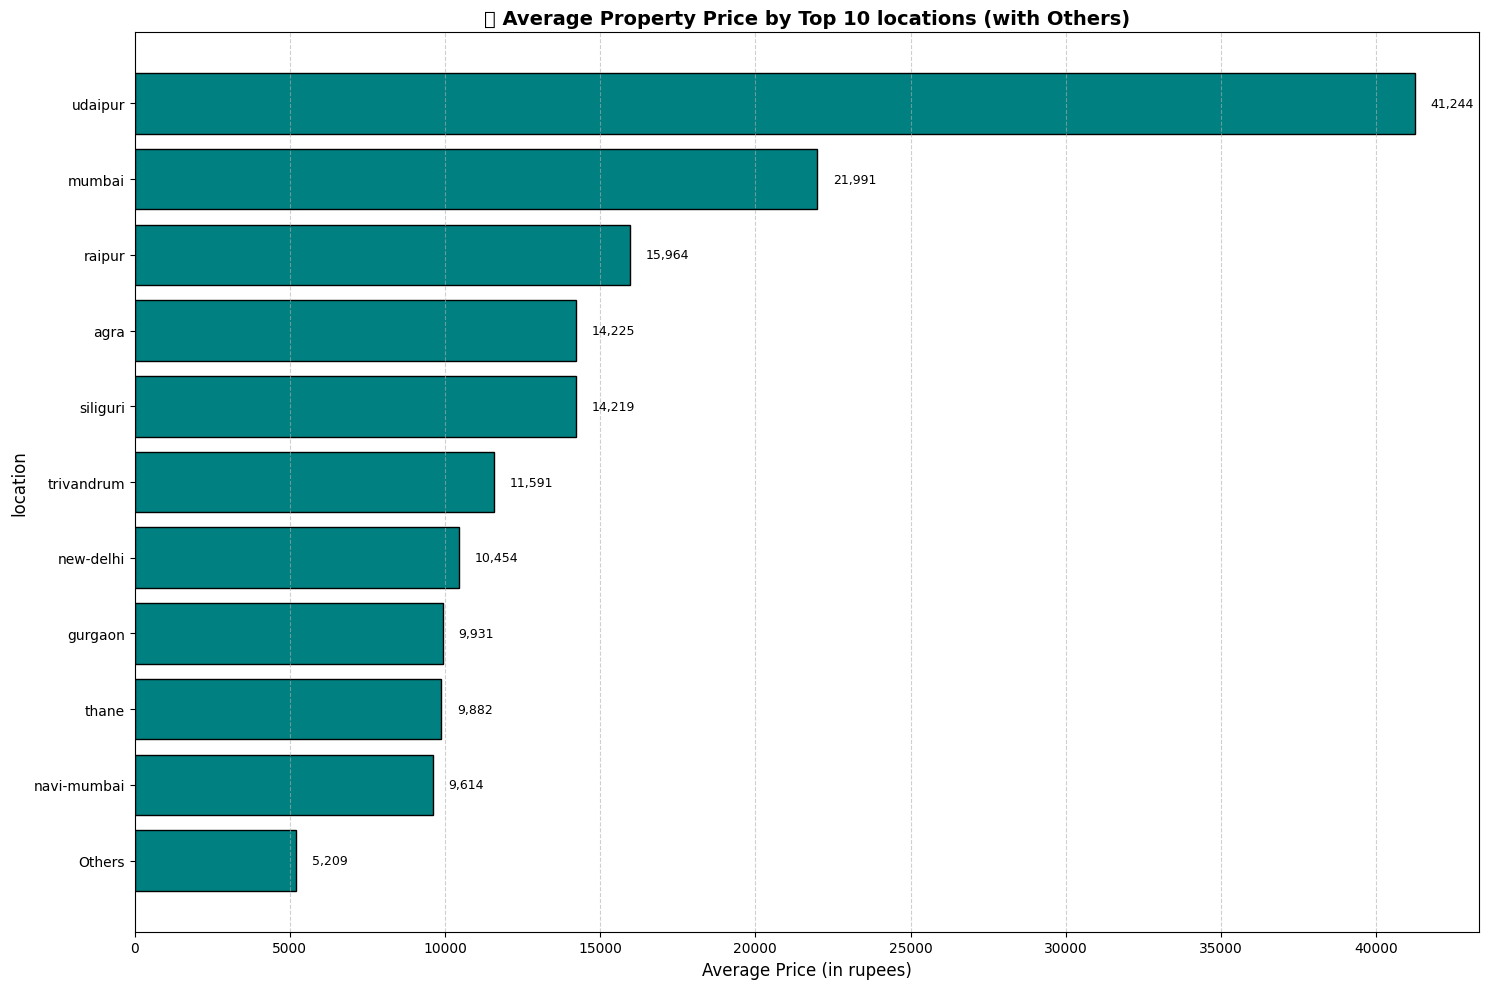

In [23]:
# Calculate average price per location
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False)

# Select top 10 and average of the rest
top_10 = avg_price.head(10)
others = avg_price.iloc[10:].mean()

# Combine
combined = pd.concat([top_10, pd.Series({'Others': others})])

# Sort again so 'Others' appears at bottom
combined = combined.sort_values(ascending=True)

# Plot
plt.figure(figsize=(15, 10))
bars = plt.barh(combined.index, combined.values, color='teal', edgecolor='black')

# Add value labels at the end of each bar
for bar in bars:
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width()):,}", va='center', fontsize=9)

# Titles and labels
plt.title("🏙️ Average Property Price by Top 10 locations (with Others)", fontsize=14, weight='bold')
plt.xlabel("Average Price (in rupees)", fontsize=12)
plt.ylabel("location", fontsize=12)

# Clean style
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


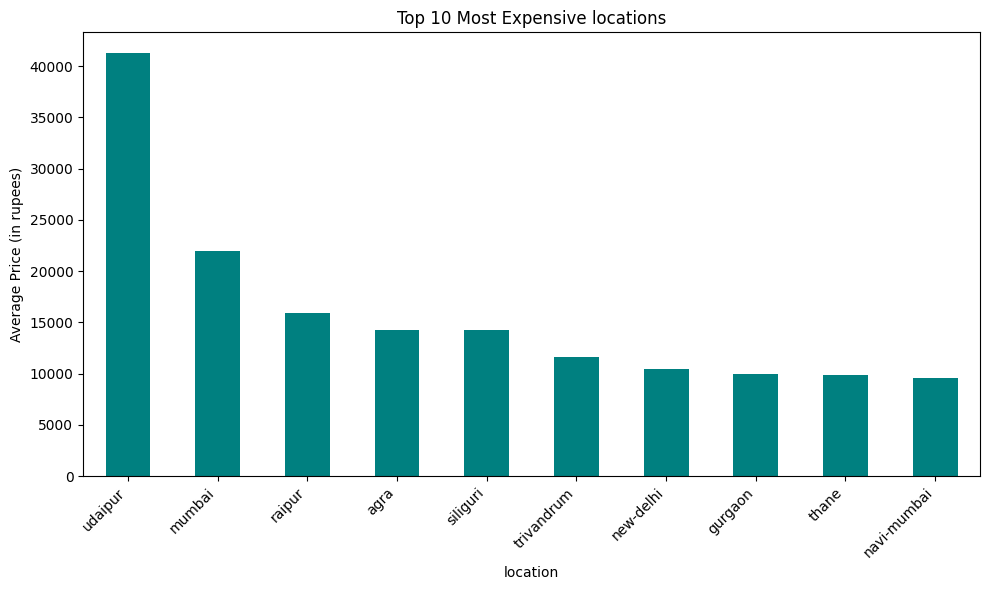

In [24]:
# Group by location and calculate the average price
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False)

# Get the top 10 most expensive locations
top_10 = avg_price.head(10)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='teal')
plt.title('Top 10 Most Expensive locations')
plt.xlabel('location')
plt.ylabel('Average Price (in rupees)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**udaipur is the highest expensive place,as it shows in the chart **


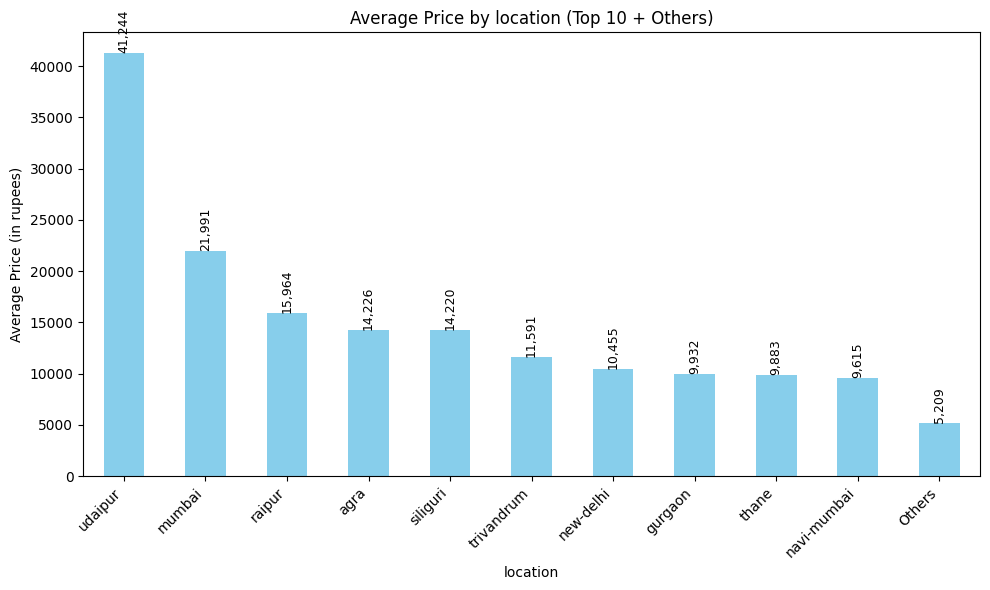

In [25]:
# Calculate average price of all other locations
others = avg_price[~avg_price.index.isin(top_10.index)].mean()

# Combine top 10 with 'Others' using concat
combined = pd.concat([top_10, pd.Series({'Others': others})])

# Sort so that 'Others' stays at the bottom
combined = combined.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = combined.plot(kind='bar', color='skyblue')
plt.title("Average Price by location (Top 10 + Others)")
plt.xlabel("location")
plt.ylabel("Average Price (in rupees)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Create color gradient (darker for higher price)
colors = plt.cm.Blues([i / len(combined) for i in range(len(combined))])[::-1]
# Add value labels above bars
for i, v in enumerate(combined):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9, rotation=90)

plt.show()


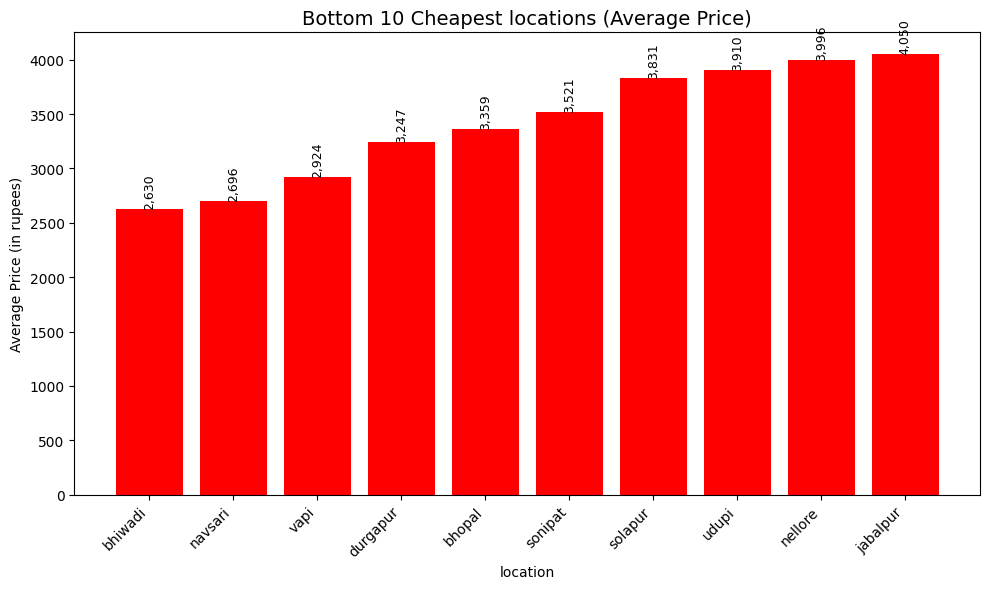

In [26]:
# Group by location and calculate average price
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=True)

#Get bottom 10 (cheapest) locations
bottom_10 = avg_price.head(10)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(bottom_10.index, bottom_10.values, color='red')
plt.title("Bottom 10 Cheapest locations (Average Price)", fontsize=14)
plt.xlabel("location")
plt.ylabel("Average Price (in rupees)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.0f}", 
             ha='center', va='bottom', fontsize=9, rotation=90)

plt.show()


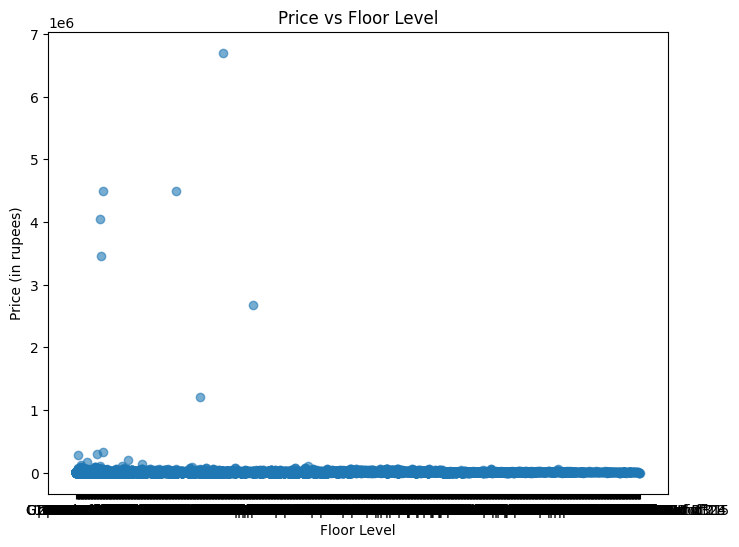

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Floor'], df['Price (in rupees)'], alpha=0.6)
plt.title("Price vs Floor Level")
plt.xlabel("Floor Level")
plt.ylabel("Price (in rupees)")
plt.show()


In [28]:
# Convert textual floors to numeric
df['Floor'] = df['Floor'].astype(str).str.extract('(\d+)').fillna(0).astype(float)


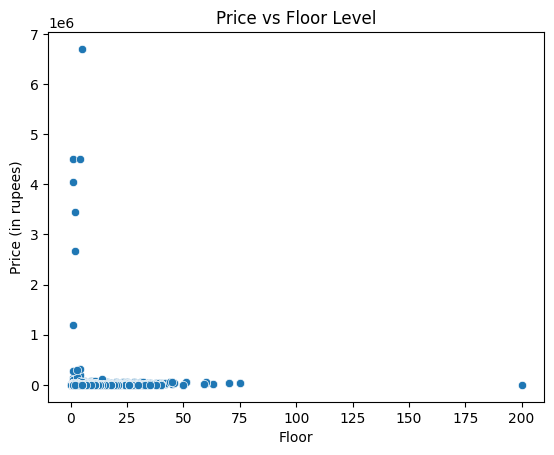

In [29]:
sns.scatterplot(x='Floor', y='Price (in rupees)', data=df)
plt.title("Price vs Floor Level")
plt.show()


In [30]:
df.head

<bound method NDFrame.head of          Index                                              Title  \
0            0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1            1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2            2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            3        1 BHK Ready to Occupy Flat for sale Kasheli   
4            4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...        ...                                                ...   
187526  187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

        Price (in rupees)  location Carpet Area         Status  Floor  \
0                  6000.0     thane    500 sqft  Ready to Move   10.

In [31]:
import re

# Extract only numeric floor numbers; non-numeric ones become 0
df['Floor'] = df['Floor'].astype(str).apply(lambda x: re.findall(r'\d+', x))
df['Floor'] = df['Floor'].apply(lambda x: int(x[0]) if x else 0)


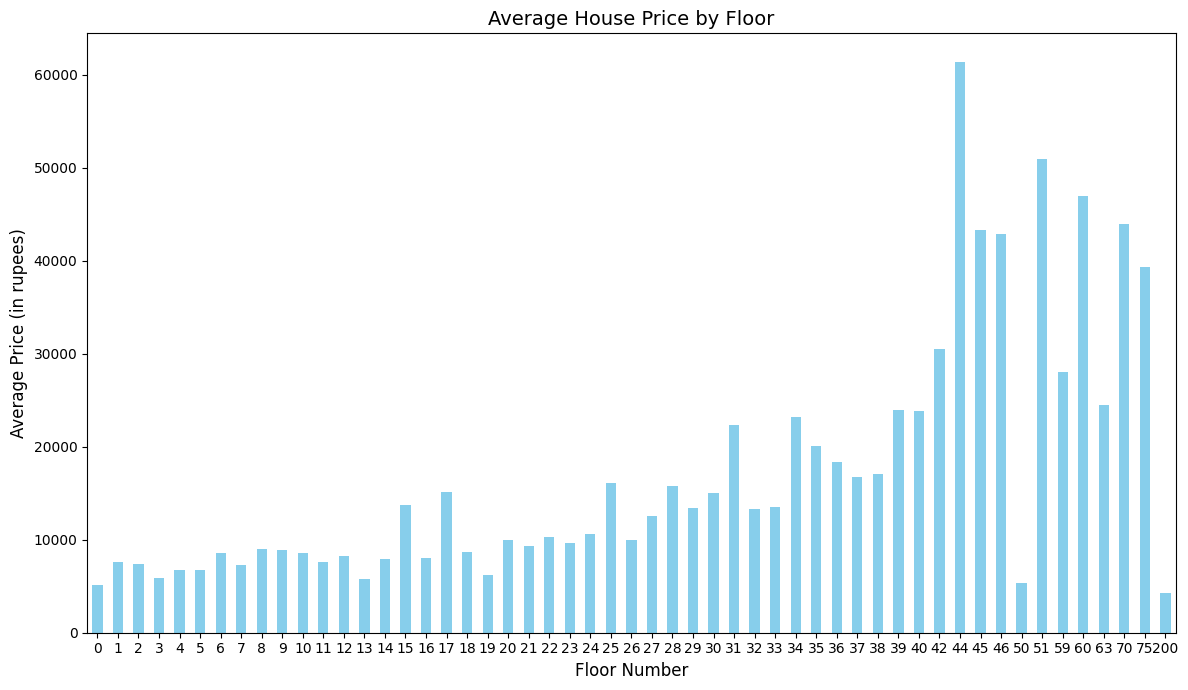

In [32]:
avg_price_by_floor = df.groupby('Floor')['Price (in rupees)'].mean().sort_index()

plt.figure(figsize=(12, 7))
avg_price_by_floor.plot(kind='bar', color='skyblue')
plt.title("Average House Price by Floor", fontsize=14)
plt.xlabel("Floor Number", fontsize=12)
plt.ylabel("Average Price (in rupees)", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


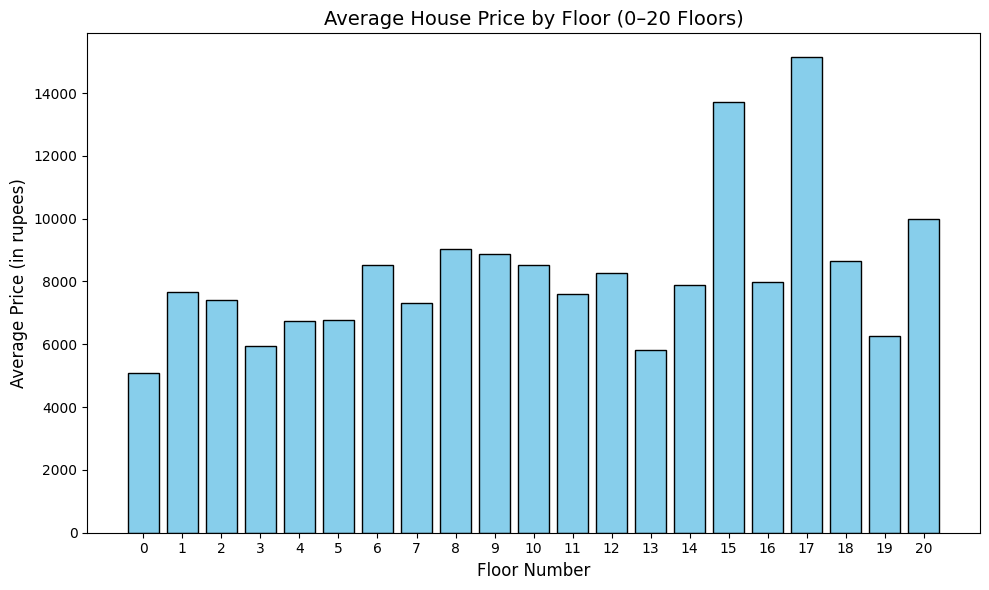

In [33]:
 #Keep only realistic floor numbers (0 to 20) ---
df_filtered = df[(df['Floor'] >= 0) & (df['Floor'] <= 20)]

#Calculate average price by floor ---
avg_price_by_floor = df_filtered.groupby('Floor')['Price (in rupees)'].mean().sort_index()

#Plot clean vertical bar chart ---
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_price_by_floor.index, avg_price_by_floor.values, color='skyblue', edgecolor='black')

plt.title("Average House Price by Floor (0–20 Floors)", fontsize=14)
plt.xlabel("Floor Number", fontsize=12)
plt.ylabel("Average Price (in rupees)", fontsize=12)

plt.xticks(avg_price_by_floor.index, rotation=0)
plt.tight_layout()
plt.show()

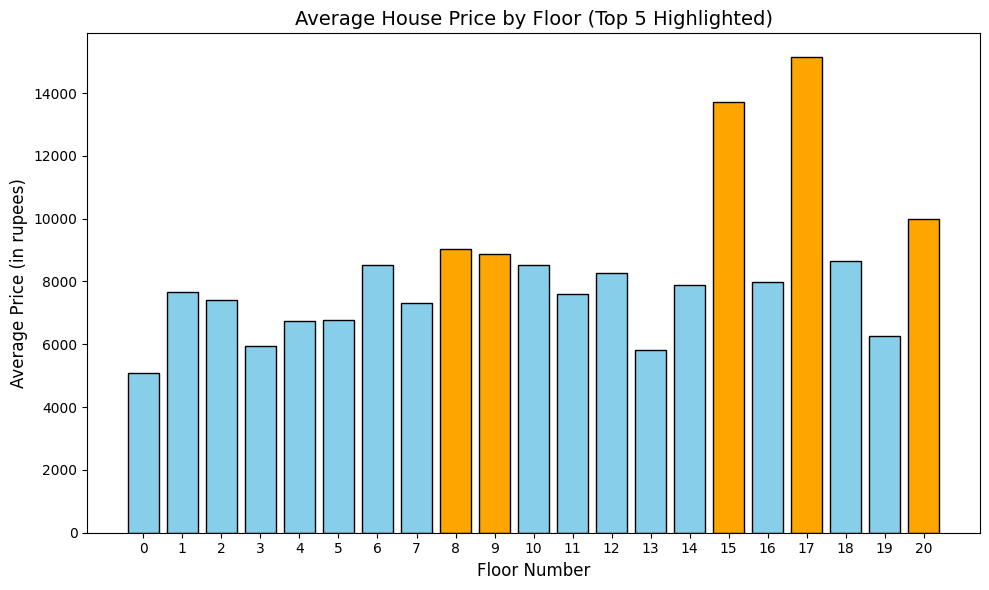

In [34]:
# Get top 5 floors
top5_floors = avg_price_by_floor.nlargest(5).index

plt.figure(figsize=(10, 6))
colors = ['orange' if floor in top5_floors else 'skyblue' for floor in avg_price_by_floor.index]
plt.bar(avg_price_by_floor.index, avg_price_by_floor.values, color=colors, edgecolor='black')

plt.title("Average House Price by Floor (Top 5 Highlighted)", fontsize=14)
plt.xlabel("Floor Number", fontsize=12)
plt.ylabel("Average Price (in rupees)", fontsize=12)
plt.xticks(avg_price_by_floor.index, rotation=0)
plt.tight_layout()
plt.show()


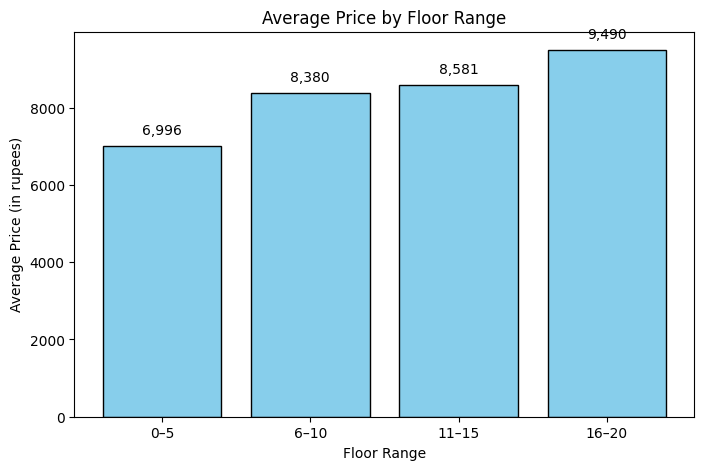

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Create floor range bins
df['FloorRange'] = pd.cut(df['Floor'], bins=[0,5,10,15,20], labels=['0–5','6–10','11–15','16–20'])

# Calculate average price (replace NaN with 0 to avoid issues)
avg_price = df.groupby('FloorRange')['Price (in rupees)'].mean().fillna(0)

# Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(avg_price.index, avg_price.values, color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Average Price by Floor Range")
plt.xlabel("Floor Range")
plt.ylabel("Average Price (in rupees)")

# ✅ Add value labels (skip NaN or 0 safely)
for i, v in enumerate(avg_price.values):
    if not pd.isna(v) and v != 0:  # Only label non-zero values
        plt.text(i, v + 300, f"{int(v):,}", ha='center', fontsize=10)

plt.show()


****price vs carpet area  scatter plot (for correlation)******

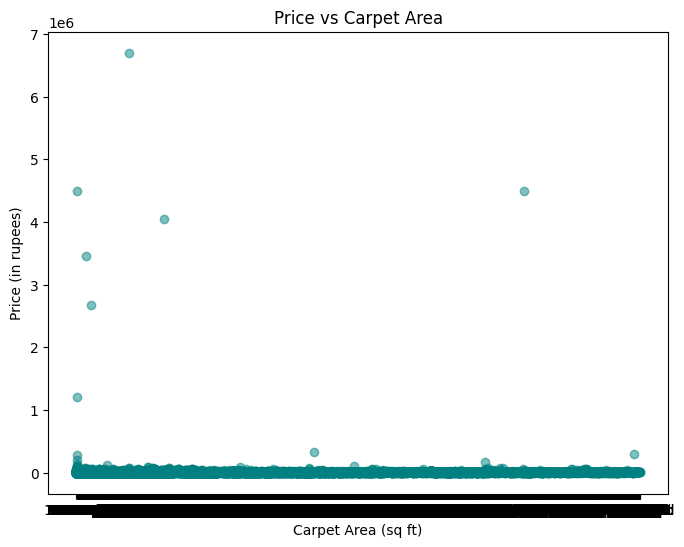

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(df['Carpet Area'], df['Price (in rupees)'], alpha=0.5, color='teal')
plt.title("Price vs Carpet Area")
plt.xlabel("Carpet Area (sq ft)")
plt.ylabel("Price (in rupees)")
plt.show()


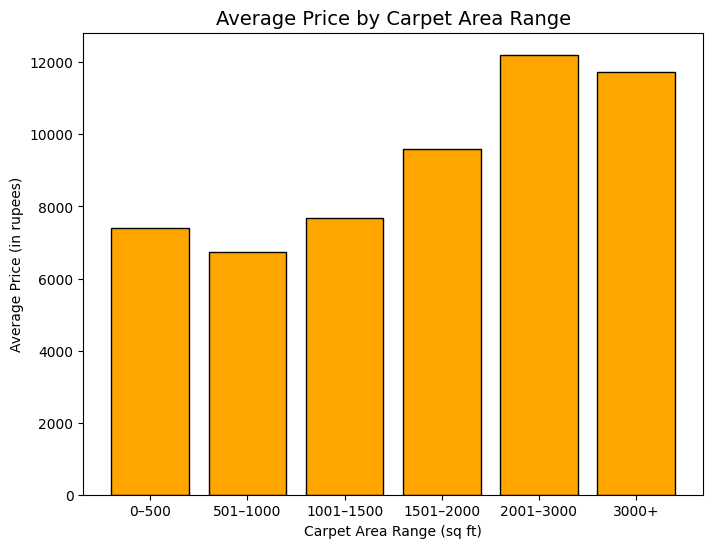

In [37]:
# Clean Carpet Area column (remove text and commas)
df['Carpet Area'] = df['Carpet Area'].astype(str).str.replace('[^0-9.]', '', regex=True)

# Convert to numeric (force errors to NaN)
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce').fillna(0)

# Define bins dynamically
max_area = df['Carpet Area'].max()
bins = [0, 500, 1000, 1500, 2000, 3000, max_area + 1]
labels = ['0–500', '501–1000', '1001–1500', '1501–2000', '2001–3000', '3000+']

# Apply binning
df['AreaRange'] = pd.cut(df['Carpet Area'], bins=bins, labels=labels, include_lowest=True)

# Calculate average price per area range
avg_price_area = df.groupby('AreaRange')['Price (in rupees)'].mean().sort_index()

# Plot bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(avg_price_area.index.astype(str), avg_price_area.values, color='orange', edgecolor='black')
plt.title("Average Price by Carpet Area Range", fontsize=14)
plt.xlabel("Carpet Area Range (sq ft)")
plt.ylabel("Average Price (in rupees)")


plt.show()


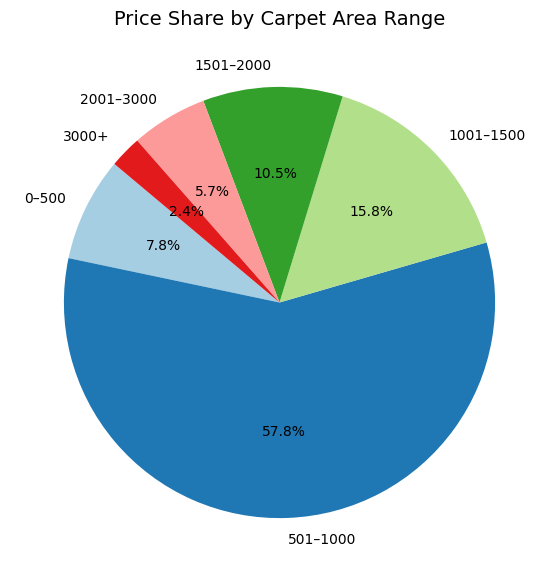

In [38]:
# Calculate total price per range
price_share = df.groupby('AreaRange')['Price (in rupees)'].sum()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(price_share, labels=price_share.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Price Share by Carpet Area Range", fontsize=14)
plt.show()


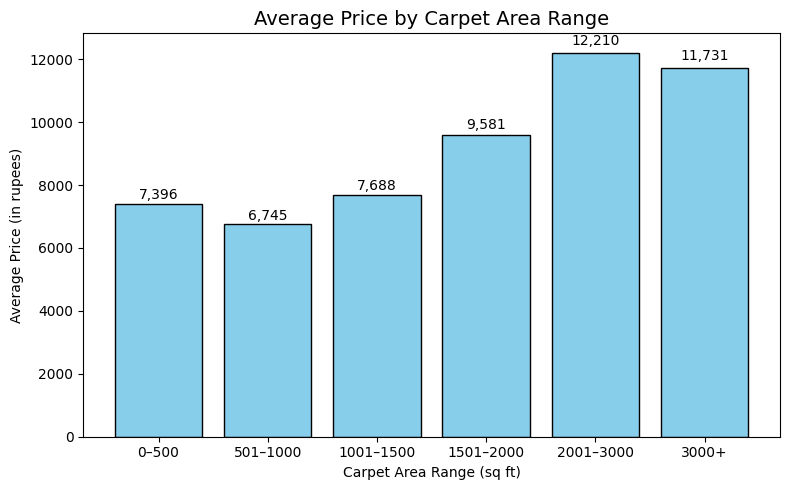

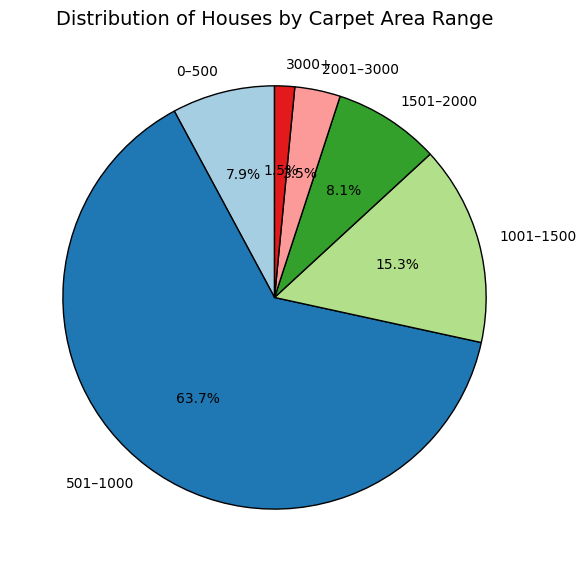

In [39]:
# Clean 'Carpet Area' column
df['Carpet Area'] = df['Carpet Area'].astype(str).str.replace('[^0-9.]', '', regex=True)
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce').fillna(0)

# Define bins and labels dynamically
max_area = df['Carpet Area'].max()
bins = [0, 500, 1000, 1500, 2000, 3000, max_area + 1]
labels = ['0–500', '501–1000', '1001–1500', '1501–2000', '2001–3000', '3000+']

# Categorize carpet area into ranges
df['AreaRange'] = pd.cut(df['Carpet Area'], bins=bins, labels=labels, include_lowest=True)

# Calculate average price by carpet area range
avg_price_area = df.groupby('AreaRange')['Price (in rupees)'].mean().sort_index()

# 🟦 1️⃣ BAR CHART: Average Price by Area Range
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_price_area.index.astype(str), avg_price_area.values, color='skyblue', edgecolor='black')

plt.title("Average Price by Carpet Area Range", fontsize=14)
plt.xlabel("Carpet Area Range (sq ft)")
plt.ylabel("Average Price (in rupees)")

# Add value labels above bars
for i, v in enumerate(avg_price_area.values):
    if pd.notna(v):
        plt.text(i, v + (0.02 * v), f"{int(v):,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 🟠 2️⃣ PIE CHART: Distribution of Listings by Area Range
area_counts = df['AreaRange'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Paired.colors, wedgeprops={'edgecolor':'black'})

plt.title("Distribution of Houses by Carpet Area Range", fontsize=14)
plt.tight_layout()
plt.show()


# ********🧩 Analyze Location vs Average Carpet Area****

****This tells you where the houses are largest on average.********

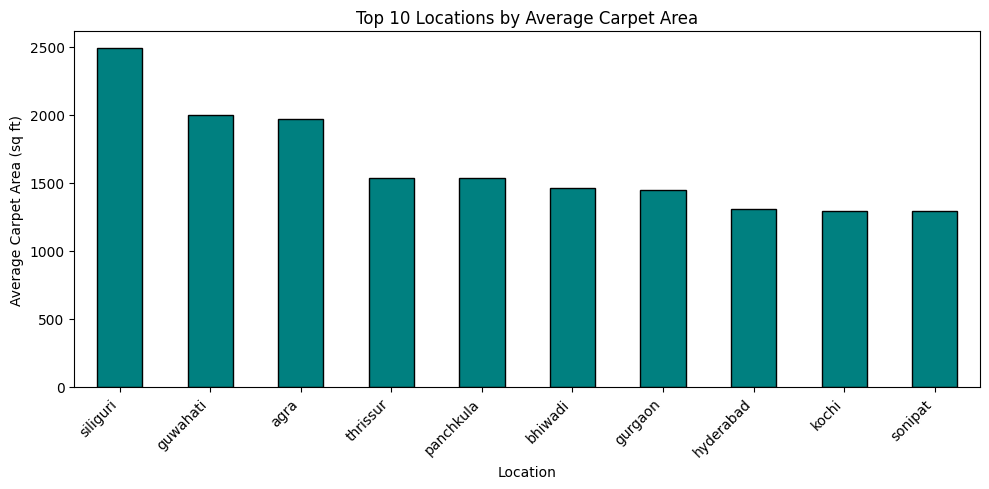

In [40]:
# Group by location and calculate average carpet area
avg_area_by_location = df.groupby('location')['Carpet Area'].mean().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10,5))
avg_area_by_location.plot(kind='bar', color='teal', edgecolor='black')

plt.title("Top 10 Locations by Average Carpet Area")
plt.xlabel("Location")
plt.ylabel("Average Carpet Area (sq ft)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


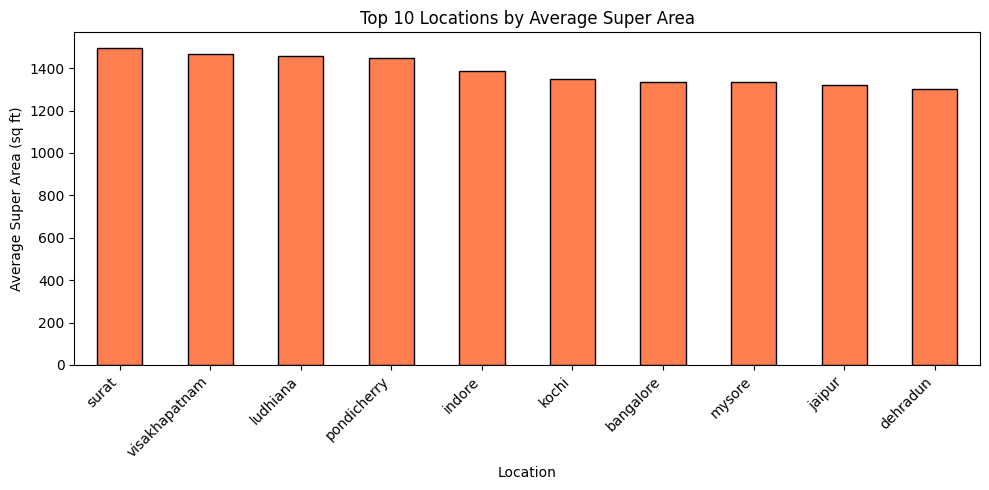

In [41]:
# Clean Super Area column
df['Super Area'] = df['Super Area'].astype(str).str.replace('[^0-9.]', '', regex=True)
df['Super Area'] = pd.to_numeric(df['Super Area'], errors='coerce')

# Group by location and calculate average Super Area
avg_super_by_location = df.groupby('location')['Super Area'].mean().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10,5))
avg_super_by_location.plot(kind='bar', color='coral', edgecolor='black')

plt.title("Top 10 Locations by Average Super Area")
plt.xlabel("Location")
plt.ylabel("Average Super Area (sq ft)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



****Carpet vs Super Area per Location (Ratio)****

********This one is more advanced but powerful — it shows how much usable area (Carpet) you get compared to Super Area in each location:********

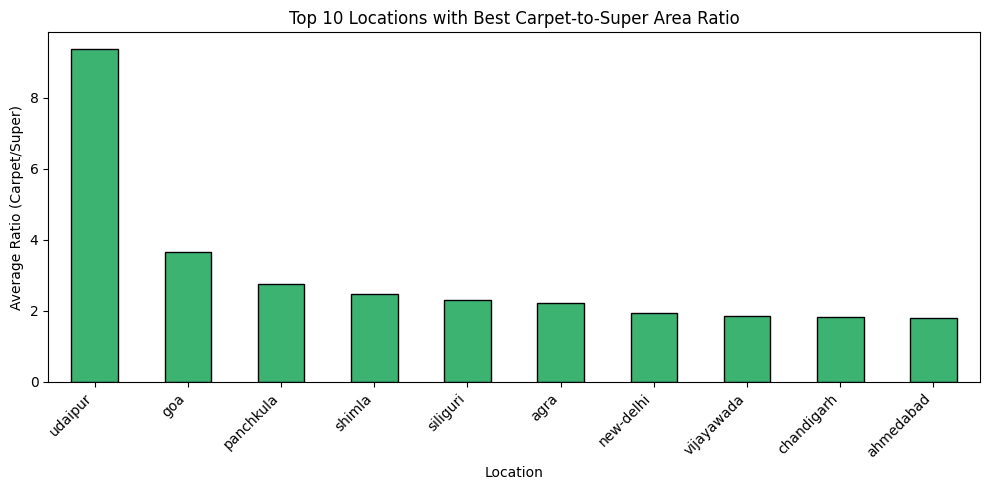

In [42]:
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')
df['Super Area'] = pd.to_numeric(df['Super Area'], errors='coerce')

# Calculate ratio
df['Carpet_to_Super_Ratio'] = df['Carpet Area'] / df['Super Area']

# Average ratio per location
ratio_by_location = df.groupby('location')['Carpet_to_Super_Ratio'].mean().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10,5))
ratio_by_location.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title("Top 10 Locations with Best Carpet-to-Super Area Ratio")
plt.xlabel("Location")
plt.ylabel("Average Ratio (Carpet/Super)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



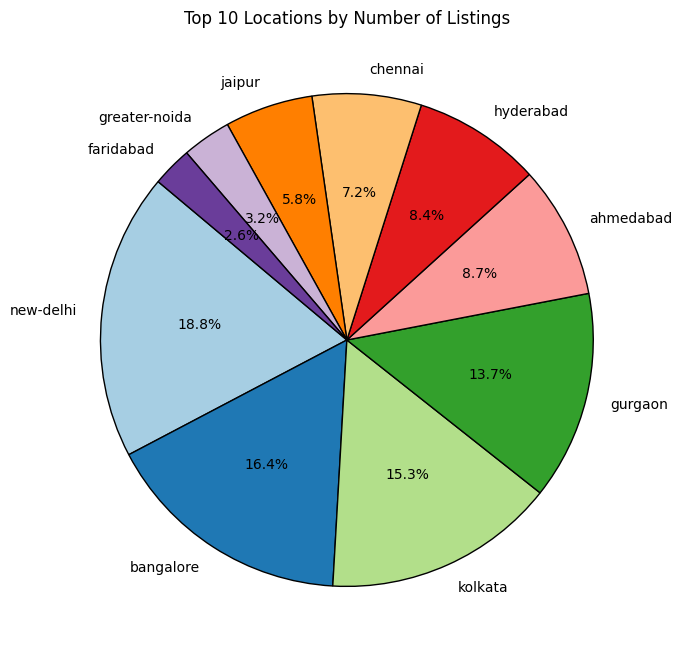

In [43]:
 #Count number of listings per location
location_counts = df['location'].value_counts().head(10)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(location_counts, 
        labels=location_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'})

plt.title("Top 10 Locations by Number of Listings")
plt.show()

>  ****🧩 Combine Insights****

********Pie chart: tells you which locations are most popular********.

********Bar chart (avg carpet/super area): tells you which locations have the largest homes********.

********Ratio chart (carpet-to-super): tells you where you get the most usable space.********

✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Index                  187531 non-null  int64   
 1   Title                  187531 non-null  object  
 2   Price (in rupees)      187531 non-null  float64 
 3   location               187531 non-null  object  
 4   Carpet Area            187531 non-null  int64   
 5   Status                 187531 non-null  object  
 6   Floor                  187531 non-null  int64   
 7   Transaction            187531 non-null  object  
 8   Furnishing             187531 non-null  object  
 9   facing                 187531 non-null  object  
 10  overlooking            187531 non-null  object  
 11  Society                187531 non-null  object  
 12  Bathroom               187531 non-null  object  
 13  Balcony                187531 non-null  object  
 14  Car 

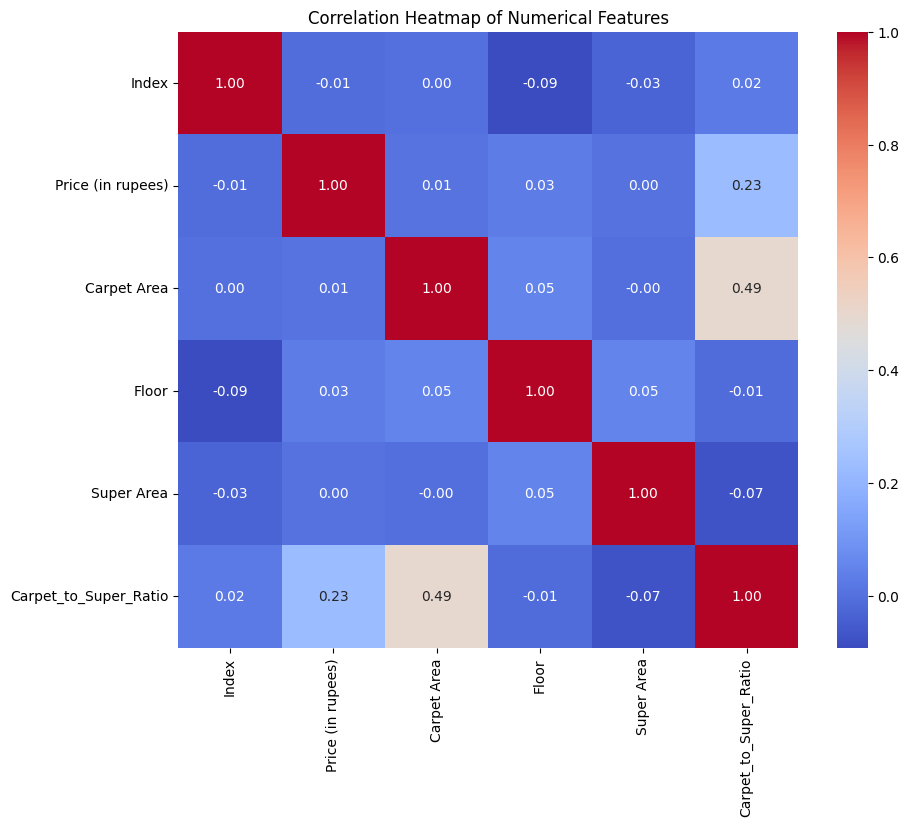

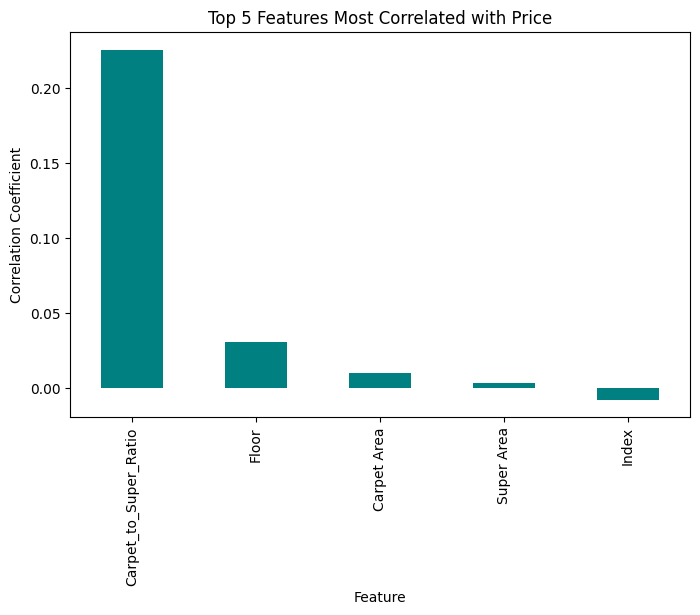

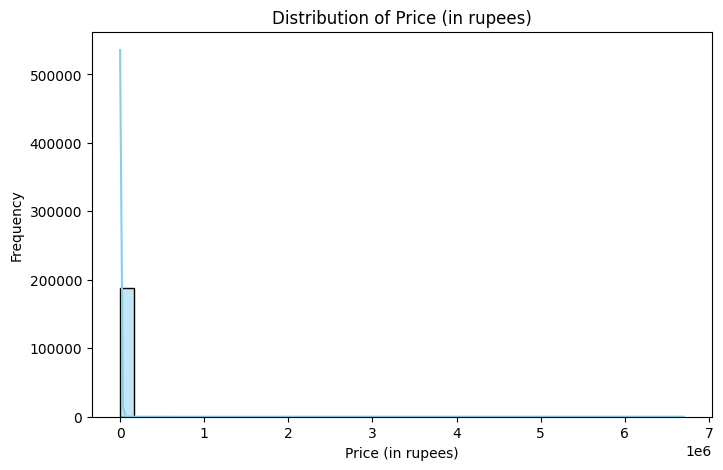

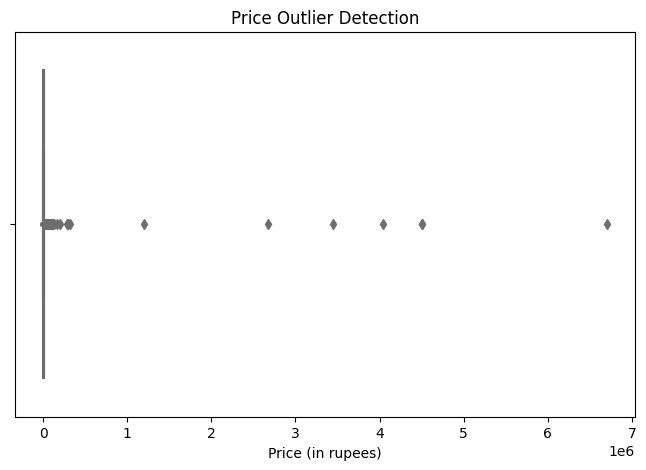

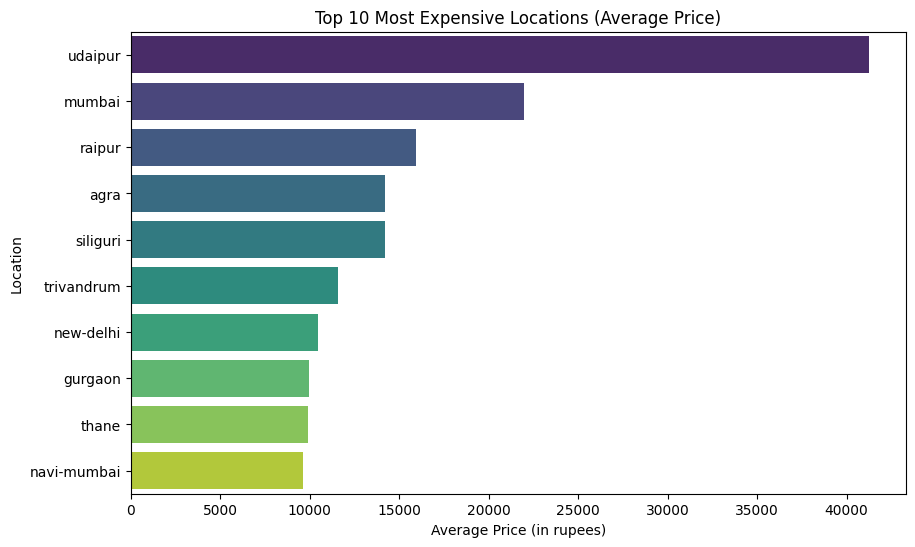

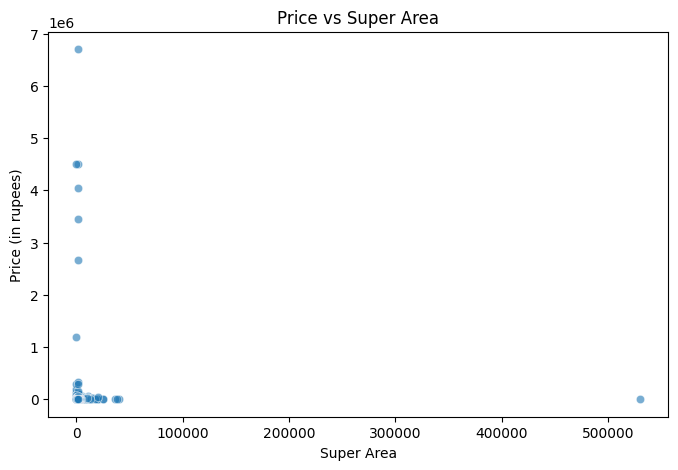

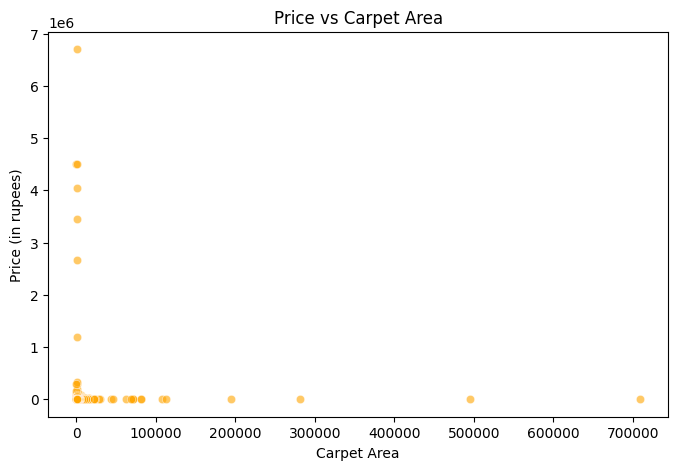

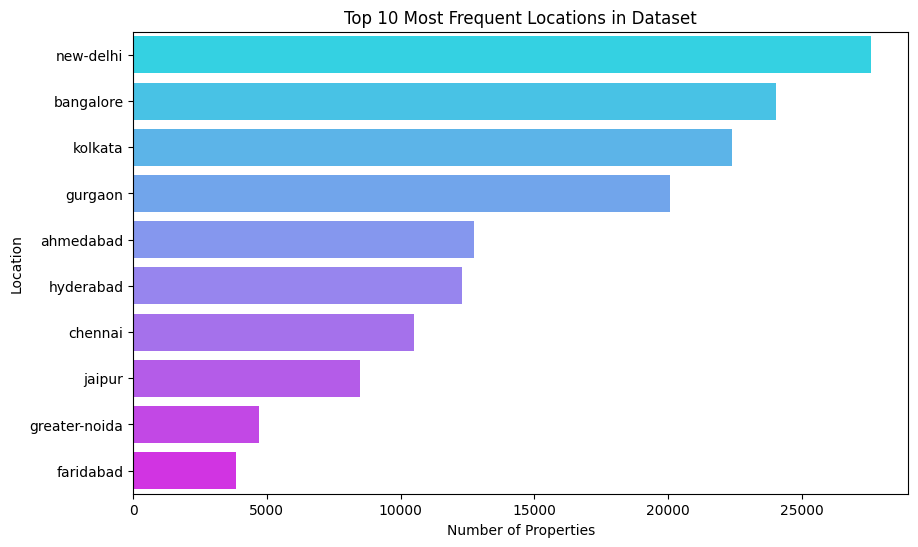

In [44]:
# --- 1️⃣ Basic info & missing values ---
print("✅ Dataset Info:")
print(df.info())

print("\n✅ Missing Values per Column:")
print(df.isnull().sum())

# 📝 Explanation:
# This helps identify missing or inconsistent data early.
# You can decide later how to handle missing values (e.g., drop or fill).

# --- 2️⃣ Summary statistics ---
print("\n✅ Summary Statistics for Numerical Columns:")
print(df.describe())

# 📝 Explanation:
# This shows central tendencies (mean, median) and spread (std, min, max).
# Look for extreme differences between mean and max → possible outliers.

# --- 3️⃣ Correlation Analysis ---
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

# Correlation with Price (in rupees)
price_corr = corr_matrix['Price (in rupees)'].sort_values(ascending=False)
print("\n✅ Correlation of Numerical Columns with Price (in rupees):")
print(price_corr)

# --- Correlation Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 📝 Explanation:
# The heatmap shows relationships between all numerical features.
# Darker red = strong positive correlation, blue = negative correlation.

# --- 4️⃣ Top correlated features with Price ---
top_corr = price_corr[1:6]  # exclude 'Price (in rupees)' itself
plt.figure(figsize=(8, 5))
top_corr.plot(kind='bar', color='teal')
plt.title("Top 5 Features Most Correlated with Price")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature")
plt.show()

# 📝 Explanation:
# Features with higher correlation values likely have a strong influence on property price.

# --- 5️⃣ Price distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Price (in rupees)'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Price (in rupees)")
plt.xlabel("Price (in rupees)")
plt.ylabel("Frequency")
plt.show()

# 📝 Explanation:
# If the plot is right-skewed (long tail to the right), it means a few very expensive properties.

# --- 6️⃣ Outlier check using boxplot ---
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price (in rupees)'], color='lightcoral')
plt.title("Price Outlier Detection")
plt.xlabel("Price (in rupees)")
plt.show()

# 📝 Explanation:
# Dots far above the box indicate high-value properties—potential outliers or luxury listings.

# --- 7️⃣ Average Price by Location (Top 10) ---
avg_price_location = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_location.values, y=avg_price_location.index, palette='viridis')
plt.title("Top 10 Most Expensive Locations (Average Price)")
plt.xlabel("Average Price (in rupees)")
plt.ylabel("Location")
plt.show()

# 📝 Explanation:
# Helps identify which locations are premium or luxury zones in your dataset.

# --- 8️⃣ Relationship: Price vs Super Area ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Super Area', y='Price (in rupees)', alpha=0.6)
plt.title("Price vs Super Area")
plt.xlabel("Super Area")
plt.ylabel("Price (in rupees)")
plt.show()

# 📝 Explanation:
# A positive upward trend means larger super areas usually cost more.

# --- 9️⃣ Relationship: Price vs Carpet Area ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Carpet Area', y='Price (in rupees)', alpha=0.6, color='orange')
plt.title("Price vs Carpet Area")
plt.xlabel("Carpet Area")
plt.ylabel("Price (in rupees)")
plt.show()

# 📝 Explanation:
# Similar to super area — should show that higher carpet area increases price.

# --- 🔟 Location frequency ---
plt.figure(figsize=(10, 6))
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='cool')
plt.title("Top 10 Most Frequent Locations in Dataset")
plt.xlabel("Number of Properties")
plt.ylabel("Location")
plt.show()

# 📝 Explanation:
# This shows the most common property hubs — useful for understanding market concentration.


✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Index                  187531 non-null  int64   
 1   Title                  187531 non-null  object  
 2   Price (in rupees)      187531 non-null  float64 
 3   location               187531 non-null  object  
 4   Carpet Area            187531 non-null  int64   
 5   Status                 187531 non-null  object  
 6   Floor                  187531 non-null  int64   
 7   Transaction            187531 non-null  object  
 8   Furnishing             187531 non-null  object  
 9   facing                 187531 non-null  object  
 10  overlooking            187531 non-null  object  
 11  Society                187531 non-null  object  
 12  Bathroom               187531 non-null  object  
 13  Balcony                187531 non-null  object  
 14  Car 

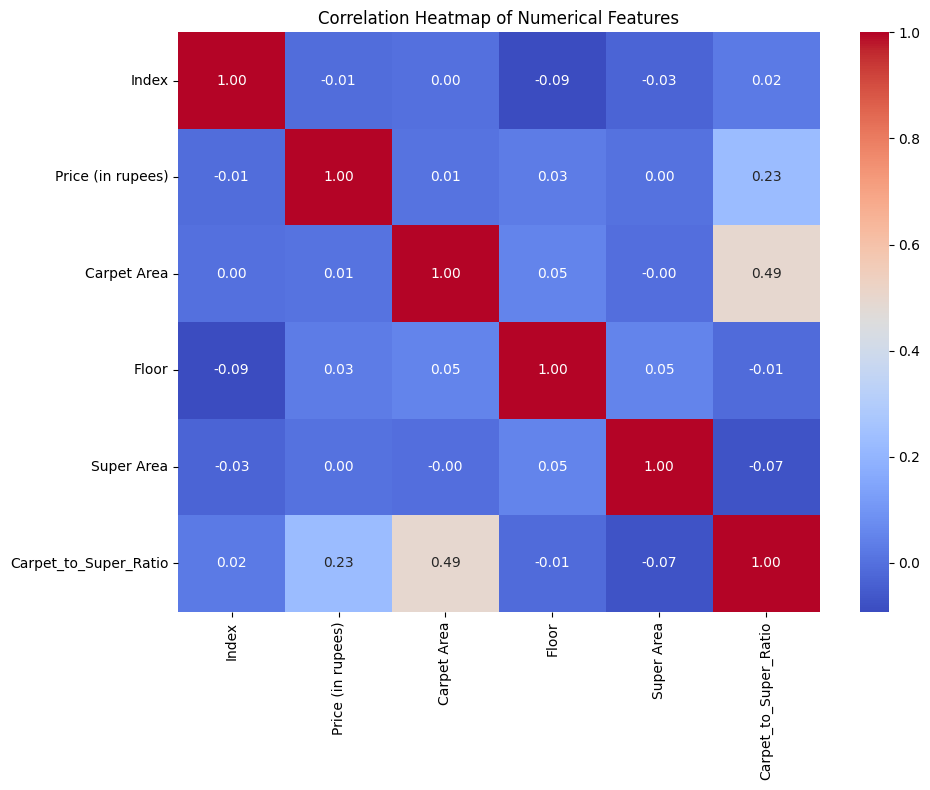

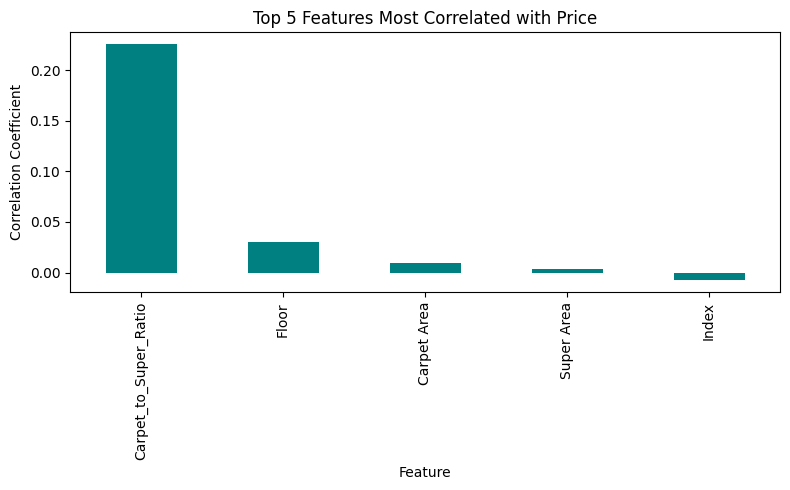

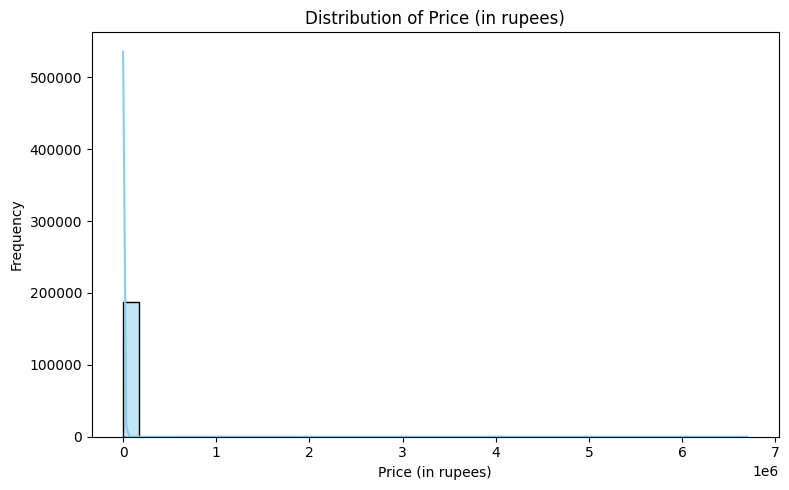

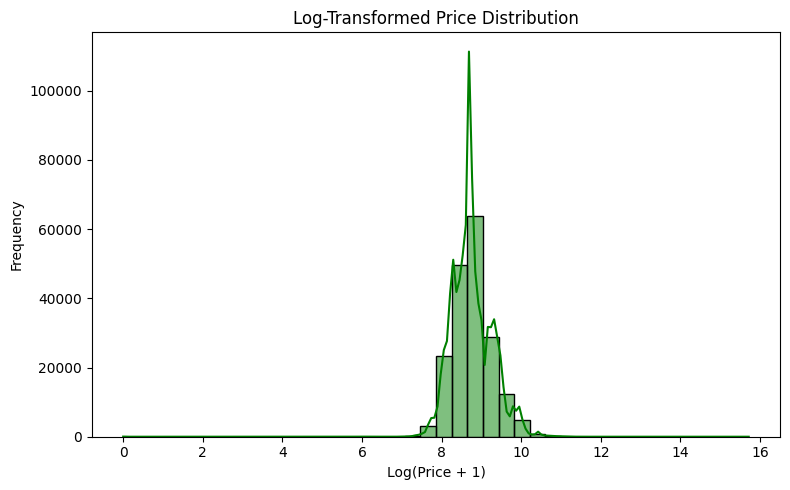

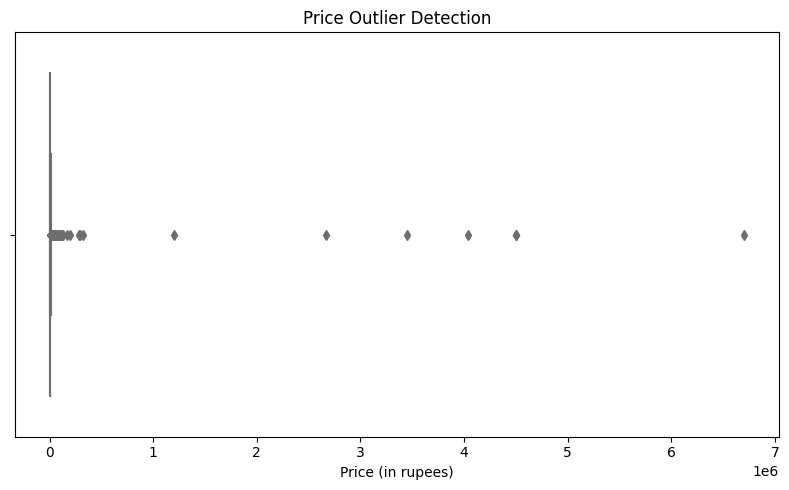

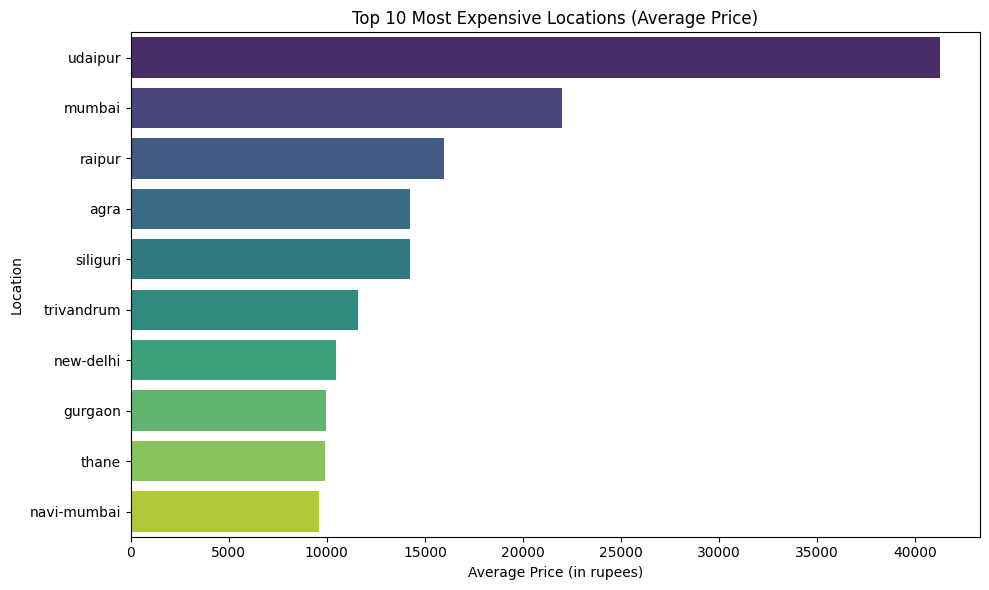

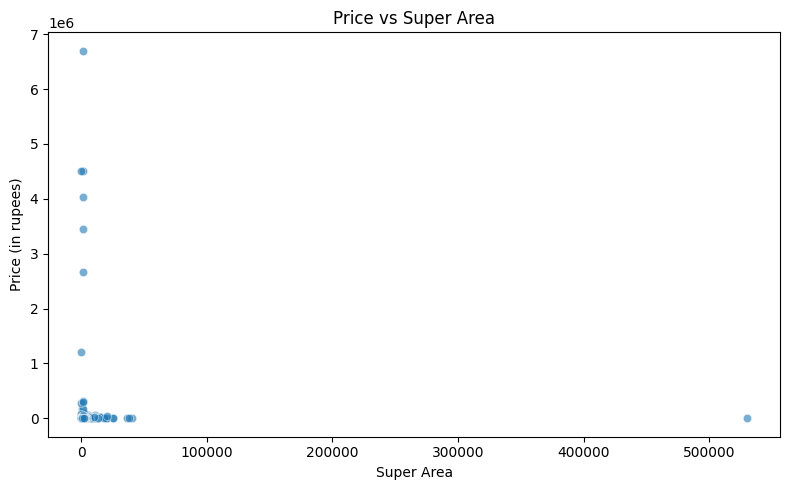

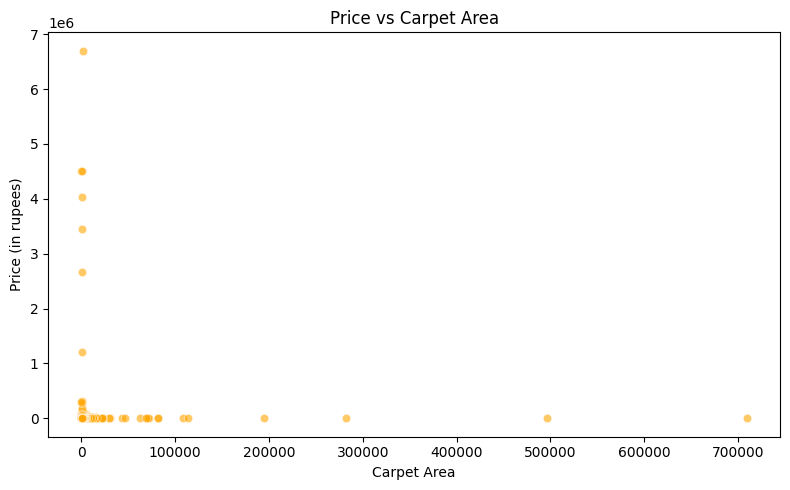

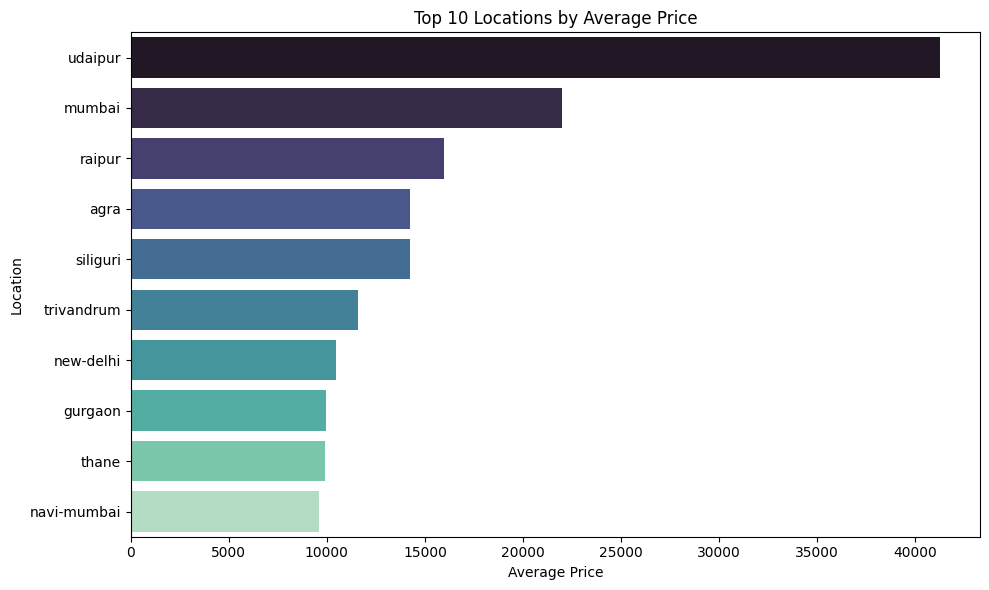

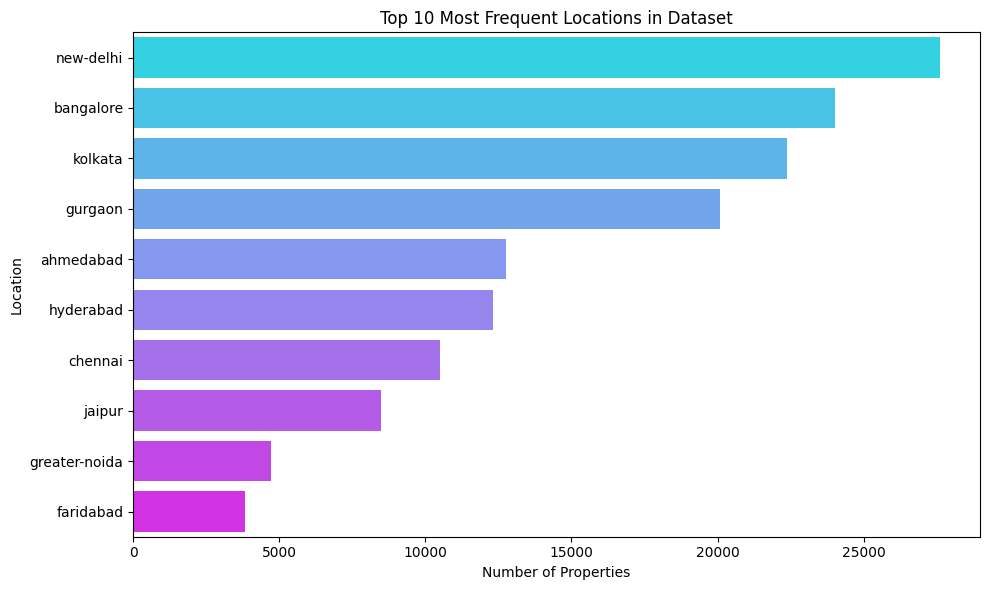

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_13/3144429866.py:137: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


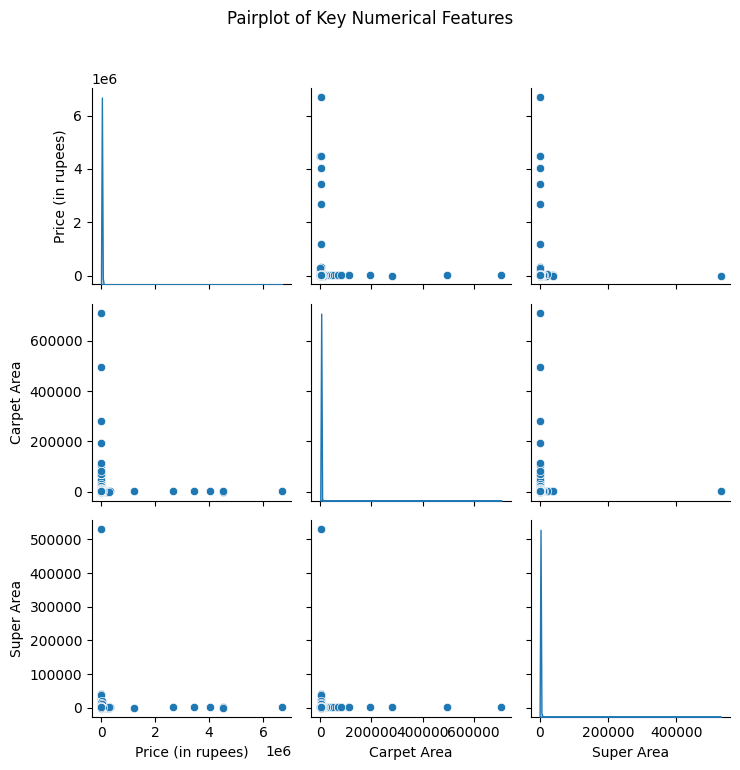


📊 Automated Insights about Price Correlations:

⚪ 'Carpet_to_Super_Ratio' has a **weak or negligible** correlation with Price (r = 0.23).
⚪ 'Floor' has a **weak or negligible** correlation with Price (r = 0.03).
⚪ 'Carpet Area' has a **weak or negligible** correlation with Price (r = 0.01).
⚪ 'Super Area' has a **weak or negligible** correlation with Price (r = 0.00).
⚪ 'Index' has a **weak or negligible** correlation with Price (r = -0.01).

✅ Interpretation:
- Strong positive correlation → likely an important predictor of price.
- Strong negative correlation → price decreases as this feature increases.
- Weak correlation → less impact on price prediction.

💾 All plots have been saved in the 'plots/' folder!


In [45]:
# ===============================
# 🏡 Real Estate Data EDA (Full + Auto Save)
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a folder to save plots
os.makedirs("plots", exist_ok=True)

# --- 1️⃣ Basic info & missing values ---
print("✅ Dataset Info:")
print(df.info())

print("\n✅ Missing Values per Column:")
print(df.isnull().sum())

# --- 2️⃣ Summary statistics ---
print("\n✅ Summary Statistics for Numerical Columns:")
print(df.describe())

# --- 3️⃣ Correlation Analysis ---
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

price_corr = corr_matrix['Price (in rupees)'].sort_values(ascending=False)
print("\n✅ Correlation of Numerical Columns with Price (in rupees):")
print(price_corr)

# --- Correlation Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png", dpi=300)
plt.show()

# --- 4️⃣ Top correlated features with Price ---
top_corr = price_corr[1:6]
plt.figure(figsize=(8, 5))
top_corr.plot(kind='bar', color='teal')
plt.title("Top 5 Features Most Correlated with Price")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature")
plt.tight_layout()
plt.savefig("plots/top_correlated_features.png", dpi=300)
plt.show()

# --- 5️⃣ Price distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Price (in rupees)'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Price (in rupees)")
plt.xlabel("Price (in rupees)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("plots/price_distribution.png", dpi=300)
plt.show()

# --- 6️⃣ Log-transformed Price distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df['Price (in rupees)']), bins=40, kde=True, color='green')
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("plots/log_price_distribution.png", dpi=300)
plt.show()

# --- 7️⃣ Outlier check using boxplot ---
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price (in rupees)'], color='lightcoral')
plt.title("Price Outlier Detection")
plt.xlabel("Price (in rupees)")
plt.tight_layout()
plt.savefig("plots/price_outliers.png", dpi=300)
plt.show()

# --- 8️⃣ Average Price by Location (Top 10) ---
avg_price_location = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_location.values, y=avg_price_location.index, palette='viridis')
plt.title("Top 10 Most Expensive Locations (Average Price)")
plt.xlabel("Average Price (in rupees)")
plt.ylabel("Location")
plt.tight_layout()
plt.savefig("plots/top_10_locations_avg_price.png", dpi=300)
plt.show()

# --- 9️⃣ Price vs Super Area ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Super Area', y='Price (in rupees)', alpha=0.6)
plt.title("Price vs Super Area")
plt.xlabel("Super Area")
plt.ylabel("Price (in rupees)")
plt.tight_layout()
plt.savefig("plots/price_vs_super_area.png", dpi=300)
plt.show()

# --- 🔟 Price vs Carpet Area ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Carpet Area', y='Price (in rupees)', alpha=0.6, color='orange')
plt.title("Price vs Carpet Area")
plt.xlabel("Carpet Area")
plt.ylabel("Price (in rupees)")
plt.tight_layout()
plt.savefig("plots/price_vs_carpet_area.png", dpi=300)
plt.show()

# --- 11️⃣ Top 10 Locations by Average Price ---
plt.figure(figsize=(10, 6))
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price.values, y=avg_price.index, palette="mako")
plt.title("Top 10 Locations by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Location")
plt.tight_layout()
plt.savefig("plots/top_10_locations_by_avg_price.png", dpi=300)
plt.show()

# --- 12️⃣ Location frequency ---
plt.figure(figsize=(10, 6))
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='cool')
plt.title("Top 10 Most Frequent Locations in Dataset")
plt.xlabel("Number of Properties")
plt.ylabel("Location")
plt.tight_layout()
plt.savefig("plots/location_frequency.png", dpi=300)
plt.show()

# --- 13️⃣ Pairplot of Key Numerical Features ---
sns.pairplot(df[['Price (in rupees)', 'Carpet Area', 'Super Area']], diag_kind='kde')
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.tight_layout()
plt.savefig("plots/pairplot_key_features.png", dpi=300)
plt.show()

# --- 14️⃣ Automated Statistical Insights ---
threshold_strong = 0.6
threshold_moderate = 0.3

price_corr = corr_matrix['Price (in rupees)'].dropna().sort_values(ascending=False)
print("\n📊 Automated Insights about Price Correlations:\n")

for feature, corr_value in price_corr.items():
    if feature == 'Price (in rupees)':
        continue
    if corr_value >= threshold_strong:
        print(f"✅ '{feature}' has a **strong positive** correlation with Price (r = {corr_value:.2f}).")
    elif corr_value >= threshold_moderate:
        print(f"🟡 '{feature}' has a **moderate positive** correlation with Price (r = {corr_value:.2f}).")
    elif corr_value <= -threshold_strong:
        print(f"🔴 '{feature}' has a **strong negative** correlation with Price (r = {corr_value:.2f}).")
    elif corr_value <= -threshold_moderate:
        print(f"🟠 '{feature}' has a **moderate negative** correlation with Price (r = {corr_value:.2f}).")
    else:
        print(f"⚪ '{feature}' has a **weak or negligible** correlation with Price (r = {corr_value:.2f}).")

print("\n✅ Interpretation:")
print("- Strong positive correlation → likely an important predictor of price.")
print("- Strong negative correlation → price decreases as this feature increases.")
print("- Weak correlation → less impact on price prediction.")

print("\n💾 All plots have been saved in the 'plots/' folder!")


In [46]:
# 🧩 TRAIN-TEST SPLIT (80% train, 20% test)

from sklearn.model_selection import train_test_split

# ✅ Define features (X) and target (y)
X = df.drop('Price (in rupees)', axis=1)   # all columns except target
y = df['Price (in rupees)']                # target column

# ✅ Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% for testing
    random_state=42      # ensures reproducibility
)

# ✅ Confirm the split
print(f"Training set: {X_train.shape[0]} rows")
print(f"Testing set: {X_test.shape[0]} rows")


Training set: 150024 rows
Testing set: 37507 rows


In [47]:
print("NaNs in X_train:", X_train.isna().sum().sum())
print("NaNs in X_test:", X_test.isna().sum().sum())
print("NaNs in y_train:", y_train.isna().sum())
print("NaNs in y_test:", y_test.isna().sum())


NaNs in X_train: 1430
NaNs in X_test: 379
NaNs in y_train: 0
NaNs in y_test: 0


In [48]:
X_train.dtypes


Index                       int64
Title                      object
location                   object
Carpet Area                 int64
Status                     object
Floor                       int64
Transaction                object
Furnishing                 object
facing                     object
overlooking                object
Society                    object
Bathroom                   object
Balcony                    object
Car Parking                object
Ownership                  object
Super Area                  int64
FloorRange               category
AreaRange                category
Carpet_to_Super_Ratio     float64
dtype: object

In [49]:
df.isna().sum()


Index                       0
Title                       0
Price (in rupees)           0
location                    0
Carpet Area                 0
Status                      0
Floor                       0
Transaction                 0
Furnishing                  0
facing                      0
overlooking                 0
Society                     0
Bathroom                    0
Balcony                     0
Car Parking                 0
Ownership                   0
Super Area                  0
FloorRange               1809
AreaRange                   0
Carpet_to_Super_Ratio       0
dtype: int64

In [50]:
df['FloorRange'].head(10)


0     6–10
1      0–5
2     6–10
3      0–5
4    16–20
5      0–5
6      0–5
7     6–10
8      0–5
9      0–5
Name: FloorRange, dtype: category
Categories (4, object): ['0–5' < '6–10' < '11–15' < '16–20']

In [51]:
print(df.columns.tolist())


['Index', 'Title', 'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'FloorRange', 'AreaRange', 'Carpet_to_Super_Ratio']


In [52]:
# Step 1: Make sure the column name matches exactly
df['FloorRange'] = df['FloorRange'].astype(str)

# Step 2: Map each range to a numeric midpoint
floor_mapping = {
    '0–5': 2.5,
    '6–10': 8.0,
    '11–15': 13.0,
    '16–20': 18.0
}

df['FloorRangeNum'] = df['FloorRange'].map(floor_mapping)

# Step 3: Handle any missing or unknown values
df['FloorRangeNum'] = df['FloorRangeNum'].fillna(df['FloorRangeNum'].mean())


In [53]:
df.isna().sum()

Index                    0
Title                    0
Price (in rupees)        0
location                 0
Carpet Area              0
Status                   0
Floor                    0
Transaction              0
Furnishing               0
facing                   0
overlooking              0
Society                  0
Bathroom                 0
Balcony                  0
Car Parking              0
Ownership                0
Super Area               0
FloorRange               0
AreaRange                0
Carpet_to_Super_Ratio    0
FloorRangeNum            0
dtype: int64

In [54]:
print(df.columns)

Index(['Index', 'Title', 'Price (in rupees)', 'location', 'Carpet Area',
       'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking',
       'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership',
       'Super Area', 'FloorRange', 'AreaRange', 'Carpet_to_Super_Ratio',
       'FloorRangeNum'],
      dtype='object')


In [55]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

Index                       0
Title                       0
location                    0
Carpet Area                 0
Status                      0
Floor                       0
Transaction                 0
Furnishing                  0
facing                      0
overlooking                 0
Society                     0
Bathroom                    0
Balcony                     0
Car Parking                 0
Ownership                   0
Super Area                  0
FloorRange               1430
AreaRange                   0
Carpet_to_Super_Ratio       0
dtype: int64
0


#  **Select Features and Target**
******Set your target and choose features.******

In [56]:
features = [
    'Carpet Area', 'Bathroom', 'Balcony', 'Car Parking',
    'location', 'Floor', 'Furnishing', 'Status', 'Ownership',
    'Super Area', 'FloorRange', 'AreaRange', 'Carpet_to_Super_Ratio',
    'Transaction', 'facing', 'overlooking'
]
target = 'Price (in rupees)'

# Only keep features that exist in your DataFrame
features = [col for col in features if col in df.columns]
print("Features used:", features)

X = df[features]
y = df[target]

Features used: ['Carpet Area', 'Bathroom', 'Balcony', 'Car Parking', 'location', 'Floor', 'Furnishing', 'Status', 'Ownership', 'Super Area', 'FloorRange', 'AreaRange', 'Carpet_to_Super_Ratio', 'Transaction', 'facing', 'overlooking']


# ****Train/Test Split****

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  ****Handle Missing Values****
************Fill NaNs in numeric and categorical columns:************

In [58]:
# Separate columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns

# Fill numeric columns
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_train[numeric_cols].median())

# Ensure "Unknown" is a category in categorical columns
from pandas.api.types import CategoricalDtype

for col in categorical_cols:
   if isinstance(X_train[col].dtype, CategoricalDtype):
        if "Unknown" not in X_train[col].cat.categories:
            X_train[col] = X_train[col].cat.add_categories("Unknown")
        if "Unknown" not in X_test[col].cat.categories:
            X_test[col] = X_test[col].cat.add_categories("Unknown")

# Fill missing values in categorical columns
X_train[categorical_cols] = X_train[categorical_cols].fillna("Unknown")
X_test[categorical_cols] = X_test[categorical_cols].fillna("Unknown")

In [59]:


numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_train[numeric_cols].median())

for col in categorical_cols:
    X_train[col] = X_train[col].fillna('Unknown')
    X_test[col] = X_test[col].fillna('Unknown')

y_train = y_train.fillna(y_train.median())
y_test = y_test.fillna(y_train.median())

In [60]:
for col in categorical_cols:
    print(f"{col}: {X_train[col].nunique()} unique values")
high_card_cols = [col for col in categorical_cols if X_train[col].nunique() > 100]
print('Dropping these columns:', high_card_cols)

X_train = X_train.drop(columns=high_card_cols)
X_test = X_test.drop(columns=high_card_cols)
categorical_cols = [col for col in categorical_cols if col not in high_card_cols]

Bathroom: 11 unique values
Balcony: 11 unique values
Car Parking: 207 unique values
location: 81 unique values
Furnishing: 3 unique values
Status: 1 unique values
Ownership: 4 unique values
FloorRange: 5 unique values
AreaRange: 6 unique values
Transaction: 4 unique values
facing: 8 unique values
overlooking: 19 unique values
Dropping these columns: ['Car Parking']


# ****One-Hot Encode Categorical Columns****
****************Convert your final set of categorical columns (those left after dropping high-cardinality columns) into a numeric format:****************

In [61]:
# One-hot encode remaining categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align columns in case some categories are only in train or test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 547212332.4317716
R^2 Score: -0.2011127768713148


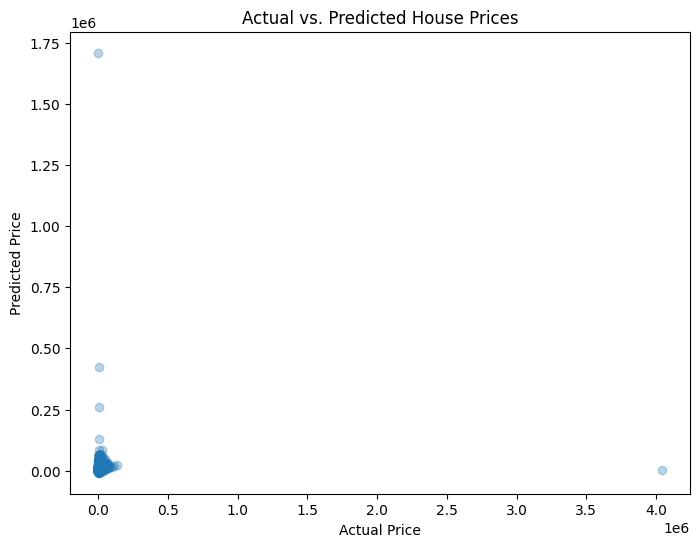

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [65]:
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 547212332.4317716
R^2 Score: -0.2011127768713148
